In [1]:
import os
import pandas as pd
import seaborn as sb
import pyodbc
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_excel("DataProject/SALES.xlsx")

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PolicyId                110 non-null    int64         
 1   Policy_Start_Date       110 non-null    datetime64[ns]
 2   Price_Before_Discuont1  110 non-null    int64         
 3   DiscountPackageID       110 non-null    int64         
 4   Discount                110 non-null    float64       
 5   Price_After_Discount    110 non-null    float64       
 6   EmployeeId              110 non-null    int64         
 7   Marketer's_Name         110 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 7.0+ KB


In [4]:
sales["PolicyId"]=sales["PolicyId"].astype('str')
sales["DiscountPackageID"]=sales["DiscountPackageID"].astype('str')
sales["EmployeeId"]=sales["EmployeeId"].astype('str')

In [ ]:
# SALES בשם VIEW את טיוב הנתונים בבסיס הנתונים עשיתי ע"י 
# (אני הכנסתי את הנתונים בבסיס הנתונים אז לא היו בהם שגיאות לטפל בהם, חוץ מהתיחסות לתאים ריקים) 
sales.info()

In [ ]:
sales.head()

In [5]:
sales.describe()
#החישובים לא מתייחסים לפוליסות אלא לכל מוצר שנמכר ללקוח בתוך פוליסה(פוליסה יכולה לכלול כמה מוצרים שנמכרו לכמה בני משפחה) כך שהחישובים הם לא עבור פוליסה
#כמות הנתונים נמוכה והם כנראה לא משקפים את המציאות בגלל שאני בניתי את הטבלאות והכנסתי נתונים ולכן כנראה סטיית התקן גבוהה

,Policy_Start_Date,Price_Before_Discuont1,Discount,Price_After_Discount
count,110,110.000000,110.000000,110.000000
mean,2021-08-12 17:40:21.818181888,150.409091,0.125364,129.181272
min,2020-02-14 00:00:00,15.000000,0.000000,12.000000
25%,2020-12-06 00:00:00,56.000000,0.100000,48.300001
50%,2021-09-30 00:00:00,101.500000,0.100000,88.899998
75%,2022-04-07 00:00:00,215.000000,0.150000,190.812500
max,2022-12-24 00:00:00,568.000000,0.500000,511.199982
std,NaN,123.926310,0.069265,103.212526


In [6]:
sales["year"]=sales["Policy_Start_Date"].dt.year

In [7]:
sales.head()

,PolicyId,Policy_Start_Date,Price_Before_Discuont1,DiscountPackageID,Discount,Price_After_Discount,EmployeeId,Marketer's_Name,year
0,900500111,2020-12-06,40,100104,0.10,36.000000,1,Levi Amir,2020
1,900500111,2020-12-06,80,100104,0.10,72.000000,1,Levi Amir,2020
2,900500111,2020-12-06,20,100106,0.15,17.000000,1,Levi Amir,2020
3,900500111,2020-12-06,43,100104,0.10,38.700001,1,Levi Amir,2020
4,900500111,2020-12-06,87,100104,0.10,78.299995,1,Levi Amir,2020


In [8]:
sales.groupby(["Marketer's_Name","year"])[["Price_After_Discount"]].sum()

Price_After_Discount
Marketer's_Name year                      
Cohen Asaf      2020            888.000000
                2021           1560.100029
                2022           1119.949978
Green Shmulik   2020            422.800003
                2021            756.000000
                2022           1349.350021
Levi Amir       2020            672.999992
                2021           1507.200012
                2022           1407.699951
Levi Efrat      2020            330.710003
                2021           1024.599953
                2022            631.250008
Levitan Tami    2020            414.349993
                2021            535.279999
                2022           1589.650002

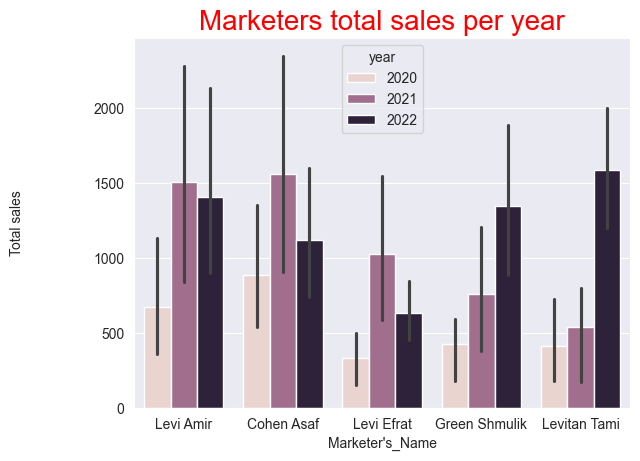

In [9]:
#ארצה לנתח את מכירות העובדים לפי שנים. לראות מי העובדים החזקים. האם ישנה מגמת שיפור במכירות כל עובד במהלך השנים
sb.set_style("darkgrid")
plt.title('Marketer''s total sales per year',loc='center',fontsize=20,color='r')
plt.ylabel('Total sales',labelpad=50,loc='center')
sb.barplot(data=sales,x="Marketer's_Name",y="Price_After_Discount",estimator="sum",hue="year")
plt.show()

In [10]:
#אפשר לראות שאנשי מכירות לוי אמיר וכהן אסף מובילים בסכום המכירות הכולל במהלך השנים אבל בשנת 2022 יש להם ירידה. אצל אנשי מכירות שמוליק גרין ותמי לויטן יש עליה דרמטית במכירות בשנה האחרונה אבל 
#סה"כ במהלך השנים מכרו פחות מלוי אמיר וכהן אסף

In [11]:
#ארצה להציג כמה פוליסות מכר כל עובד בכל שנה
x=sales.groupby(["Marketer's_Name","year"])[["PolicyId"]].nunique()

In [12]:
x

PolicyId
Marketer's_Name year          
Cohen Asaf      2020         2
                2021         4
                2022         4
Green Shmulik   2020         2
                2021         4
                2022         5
Levi Amir       2020         2
                2021         4
                2022         4
Levi Efrat      2020         2
                2021         4
                2022         4
Levitan Tami    2020         2
                2021         3
                2022         5

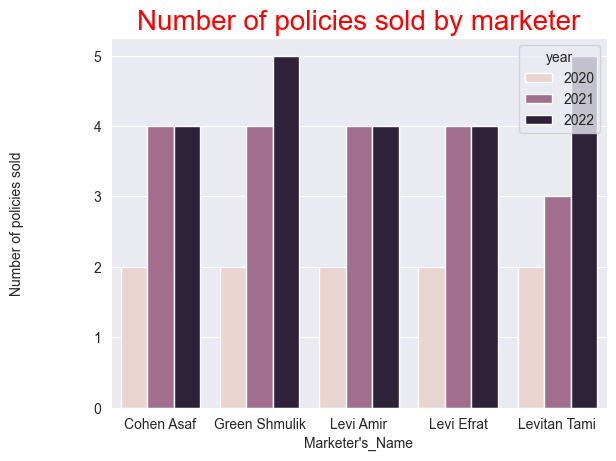

In [13]:
sb.set_style("darkgrid")
plt.title('Number of policies sold by marketer',loc='center',fontsize=20,color='r')
plt.ylabel('Number of policies sold',labelpad=50,loc='center')
sb.barplot(data=x,x="Marketer's_Name",y="PolicyId",hue="year")
plt.show()

In [14]:
#אפשר לראות שכמות הפוליסות שמוכרים המשווקים בשנה כמעט זהות (חוץ מתמי לויטן) אבל יש הבדלים
#משמעותיים בסכומי המכירות שלהם ז"א שיש משווקים שיודעים למכור בסכום גבוה יותר כל פוליסה
#אפשר לראות שמבחינת כמות פוליסות נמכרות יש שמירה על יציבות או שיפור אצל אנשי המכירות, אבל זה לא בא לידי ביטוי בסכום המכירות אצל כולם. מבחינת
#סכום המכירות יש שיפור אצל אנשי מכירות שמוליק גרין ותמי לויטן (אצל תמי זה תואם גם לגידול בכמות הפוליסות הנמכרות), אצל היתר יש ירידה בסכום המכירות בשנת 2022 

In [15]:
#מומלץ לעשות סדנת מכירות למשווקים שמוכרים פוליסות בסכומים נמוכים, על מנת לשפר ביצועים. הם כבר נמצאים בפגישה וסוגרים עסקה, שידעו להגדיל את הסכומים למכירה

In [16]:
x["TotalSales"]=sales.groupby(["Marketer's_Name","year"])[["Price_After_Discount"]].sum()

In [17]:
x.rename(columns={"PolicyId": "Number of policies sold"}, inplace=True)

In [18]:
x

Number of policies sold   TotalSales
Marketer's_Name year                                      
Cohen Asaf      2020                        2   888.000000
                2021                        4  1560.100029
                2022                        4  1119.949978
Green Shmulik   2020                        2   422.800003
                2021                        4   756.000000
                2022                        5  1349.350021
Levi Amir       2020                        2   672.999992
                2021                        4  1507.200012
                2022                        4  1407.699951
Levi Efrat      2020                        2   330.710003
                2021                        4  1024.599953
                2022                        4   631.250008
Levitan Tami    2020                        2   414.349993
                2021                        3   535.279999
                2022                        5  1589.650002

In [19]:
x.describe()
# שגוי כי הוא סופר מספר שורות ולא מספר פוליסות בטבלהcount
#ממוצע- כמה עשה בממוצע משווק בשנה בכל פרמטר (בהתיחס לכל השנים ולכל המשווקים)
#סטיית התקן גבוהה בנתונים (כי כמות הנתונים בבסיס הנתונים הזה יחסית קטנה ולא בהכרח משקפת את המציאות, אני בניתי את הנתונים)

,Number of policies sold,TotalSales
count,15.000000,15.000000
mean,3.400000,947.329330
std,1.121224,450.027061
min,2.000000,330.710003
25%,2.000000,583.265003
50%,4.000000,888.000000
75%,4.000000,1378.524986
max,5.000000,1589.650002


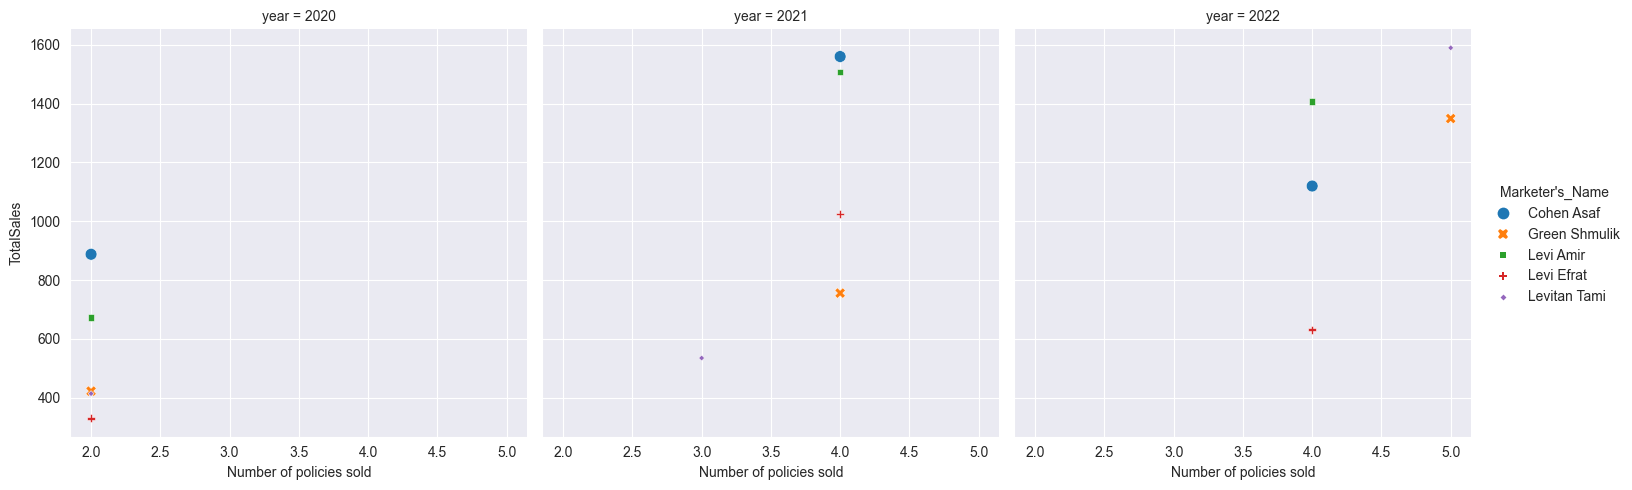

In [20]:
#נרצה לראות כל שנה מה סכום המכירה הכולל שמכר כל איש מכירות ביחס לכמות הפוליסות שמכר
sb.set_style("darkgrid")
sb.relplot(data=x,x="Number of policies sold",y="TotalSales",hue="Marketer's_Name",col="year",style="Marketer's_Name",size="Marketer's_Name")
plt.show()

In [21]:
x["Mean_Price_For_Policy"]=x.TotalSales/x["Number of policies sold"]

In [22]:
x

Number of policies sold   TotalSales  \
Marketer's_Name year                                         
Cohen Asaf      2020                        2   888.000000   
                2021                        4  1560.100029   
                2022                        4  1119.949978   
Green Shmulik   2020                        2   422.800003   
                2021                        4   756.000000   
                2022                        5  1349.350021   
Levi Amir       2020                        2   672.999992   
                2021                        4  1507.200012   
                2022                        4  1407.699951   
Levi Efrat      2020                        2   330.710003   
                2021                        4  1024.599953   
                2022                        4   631.250008   
Levitan Tami    2020                        2   414.349993   
                2021                        3   535.279999   
                2022                        5  1589.650002   

                      Mean_Price_For_Policy  
Marketer's_Name year                         
Cohen Asaf      2020             444.000000  
                2021             390.025007  
                2022             279.987494  
Green Shmulik   2020             211.400002  
                2021             189.000000  
                2022             269.870004  
Levi Amir       2020             336.499996  
                2021             376.800003  
                2022             351.924988  
Levi Efrat      2020             165.355001  
                2021             256.149988  
                2022             157.812502  
Levitan Tami    2020             207.174996  
                2021             178.426666  
                2022             317.930000

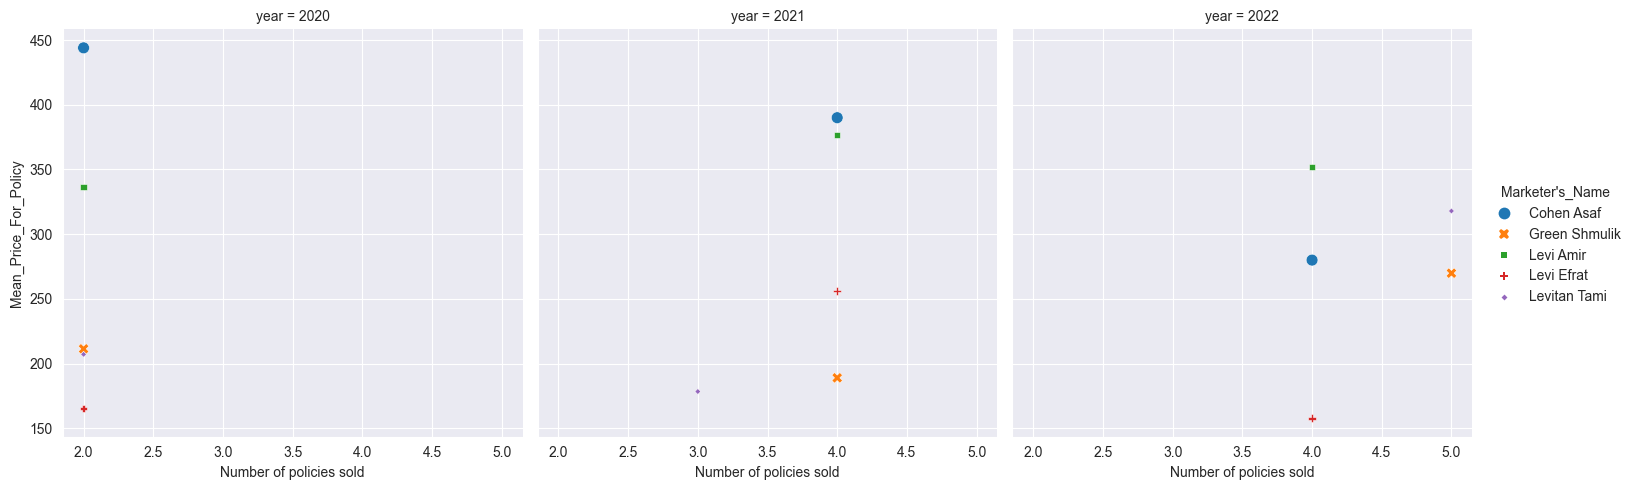

In [23]:
#נראה גם לכל איש מכירות כל שנה מה מחיר הפוליסה שמכר בממוצע
sb.relplot(data=x,x="Number of policies sold",y="Mean_Price_For_Policy",hue="Marketer's_Name",col="year",style="Marketer's_Name",size="Marketer's_Name")
plt.show()

In [24]:
#. אפשר לראות שאיש מכירות אמיר לוי מהמובילים במחיר ממוצע לפוליסה. איש מכירות אסף כהן גם מהמובילים אבל במגמת ירידה במהלך השנים. אשת המכירות אפרת לוי מוכרת במחיר נמוך בממוצע לפוליסה, ביחס לאחרים
#איש המכירות שמוליק גרין השתפר בשנת 2022 אבל עדיין נדרש שיפור. אשת המכירות תמי לויטן השתפרה משמעותית בשנת 2022. מסקנות לביצוע
#  מעקב וליווי מנהל בפגישות עיעיאשל איש המכירות אסף כהן לשינוי מגמת הירידה במחיר מכירה ממוצע. אותו דבר לגבי אשת המכירות לוי אפרת שנתוניה נמוכים ביחס לאחרים.מעקב אחרי הביצועים של איש מכירות שמוליק גרין  
#שממשיכה מגמת השיפור במכירה שלו. וכך גם לגבי אשת מכירות תמי לויטן

In [25]:
PolicyDetails2=pd.read_excel("DataProject/PolicyDetails2.xlsx")

In [26]:
PolicyDetails2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PolicyId                110 non-null    int64         
 1   InsProductId            110 non-null    int64         
 2   InsProductName          110 non-null    object        
 3   InsCategoryId           110 non-null    int64         
 4   InsCategoryName         110 non-null    object        
 5   Policy_Start_Date       110 non-null    datetime64[ns]
 6   Policy_End_Date         26 non-null     datetime64[ns]
 7   Policy_End_Reason       26 non-null     object        
 8   Price_Before_Discuont1  110 non-null    int64         
 9   Discount                110 non-null    float64       
 10  Price_After_Discount    110 non-null    float64       
 11  CompensationSum         52 non-null     float64       
 12  Smoke                   110 non-null    bool      

In [27]:
PolicyDetails2["PolicyId"]=PolicyDetails2["PolicyId"].astype('str')
PolicyDetails2["InsCategoryId"]=PolicyDetails2["InsCategoryId"].astype('str')
PolicyDetails2["InsProductId"]=PolicyDetails2["InsProductId"].astype('str')
PolicyDetails2["EmployeeId"]=PolicyDetails2["EmployeeId"].astype('str')

In [28]:
PolicyDetails2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PolicyId                110 non-null    object        
 1   InsProductId            110 non-null    object        
 2   InsProductName          110 non-null    object        
 3   InsCategoryId           110 non-null    object        
 4   InsCategoryName         110 non-null    object        
 5   Policy_Start_Date       110 non-null    datetime64[ns]
 6   Policy_End_Date         26 non-null     datetime64[ns]
 7   Policy_End_Reason       26 non-null     object        
 8   Price_Before_Discuont1  110 non-null    int64         
 9   Discount                110 non-null    float64       
 10  Price_After_Discount    110 non-null    float64       
 11  CompensationSum         52 non-null     float64       
 12  Smoke                   110 non-null    bool      

In [29]:
PolicyDetails2.head()

,PolicyId,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,EmployeeId,Marketer's_Name
0,900500111,104,BASIK,2,Health,2020-12-06,NaT,NaN,40,0.10,36.000000,NaN,False,1,Levi Amir
1,900500111,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,80,0.10,72.000000,NaN,False,1,Levi Amir
2,900500111,106,Ambulatory,2,Health,2020-12-06,NaT,NaN,20,0.15,17.000000,NaN,False,1,Levi Amir
3,900500111,104,BASIK,2,Health,2020-12-06,NaT,NaN,43,0.10,38.700001,NaN,False,1,Levi Amir
4,900500111,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,87,0.10,78.299995,NaN,False,1,Levi Amir


In [30]:
PolicyDetails2.describe()

,Policy_Start_Date,Policy_End_Date,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum
count,110,26,110.000000,110.000000,110.000000,5.200000e+01
mean,2021-08-12 17:40:21.818181888,2023-12-21 11:04:36.923076864,150.409091,0.125364,129.181272,5.165769e+05
min,2020-02-14 00:00:00,2023-04-21 00:00:00,15.000000,0.000000,12.000000,8.000000e+03
25%,2020-12-06 00:00:00,2023-09-22 18:00:00,56.000000,0.100000,48.300001,2.000000e+05
50%,2021-09-30 00:00:00,2023-11-27 00:00:00,101.500000,0.100000,88.899998,2.000000e+05
75%,2022-04-07 00:00:00,2024-03-25 00:00:00,215.000000,0.150000,190.812500,1.000000e+06
max,2022-12-24 00:00:00,2024-12-20 00:00:00,568.000000,0.500000,511.199982,2.000000e+06
std,NaN,NaN,123.926310,0.069265,103.212526,4.823840e+05


In [31]:
#גם פה סטיית התקן גבוהה מהסיבה שהזכרתי קודם לכן

In [32]:
PolicyDetails2["Year"]=PolicyDetails2["Policy_Start_Date"].dt.year

In [33]:
PolicyDetails2.groupby(["InsCategoryName","InsProductName"])[["InsProductId"]].count()

InsProductId
InsCategoryName          InsProductName                                
Health                   Ambulatory                                  11
                         BASIK                                       23
                         Critical illness                            18
                         Service letter- TOP to the child             1
                         Surgeries in Israel                         25
Life                     RISK-1                                       2
                         RISK-10                                     10
                         RISK-15                                     11
Loss of working capacity Disability insurance SA                      3
                         MITRIYA insurance                            6

In [34]:
y=PolicyDetails2.groupby(["InsCategoryName","InsProductName"]).agg({"InsProductId":"count","Price_After_Discount":"sum"})

In [35]:
y

InsProductId  \
InsCategoryName          InsProductName                                   
Health                   Ambulatory                                  11   
                         BASIK                                       23   
                         Critical illness                            18   
                         Service letter- TOP to the child             1   
                         Surgeries in Israel                         25   
Life                     RISK-1                                       2   
                         RISK-10                                     10   
                         RISK-15                                     11   
Loss of working capacity Disability insurance SA                      3   
                         MITRIYA insurance                            6   

                                                           Price_After_Discount  
InsCategoryName          InsProductName                                          
Health                   Ambulatory                                  273.700003  
                         BASIK                                      1370.499969  
                         Critical illness                           2867.950035  
                         Service letter- TOP to the child             15.299999  
                         Surgeries in Israel                        3168.599937  
Life                     RISK-1                                      371.500000  
                         RISK-10                                    2147.950069  
                         RISK-15                                    2779.199913  
Loss of working capacity Disability insurance SA                     576.840012  
                         MITRIYA insurance                           638.400005

In [36]:
y.rename(columns={"InsProductId":"Number of policies sold","Price_After_Discount":"Total sales amount"}, inplace=True)

In [37]:
y

Number of policies sold  \
InsCategoryName          InsProductName                                              
Health                   Ambulatory                                             11   
                         BASIK                                                  23   
                         Critical illness                                       18   
                         Service letter- TOP to the child                        1   
                         Surgeries in Israel                                    25   
Life                     RISK-1                                                  2   
                         RISK-10                                                10   
                         RISK-15                                                11   
Loss of working capacity Disability insurance SA                                 3   
                         MITRIYA insurance                                       6   

                                                           Total sales amount  
InsCategoryName          InsProductName                                        
Health                   Ambulatory                                273.700003  
                         BASIK                                    1370.499969  
                         Critical illness                         2867.950035  
                         Service letter- TOP to the child           15.299999  
                         Surgeries in Israel                      3168.599937  
Life                     RISK-1                                    371.500000  
                         RISK-10                                  2147.950069  
                         RISK-15                                  2779.199913  
Loss of working capacity Disability insurance SA                   576.840012  
                         MITRIYA insurance                         638.400005

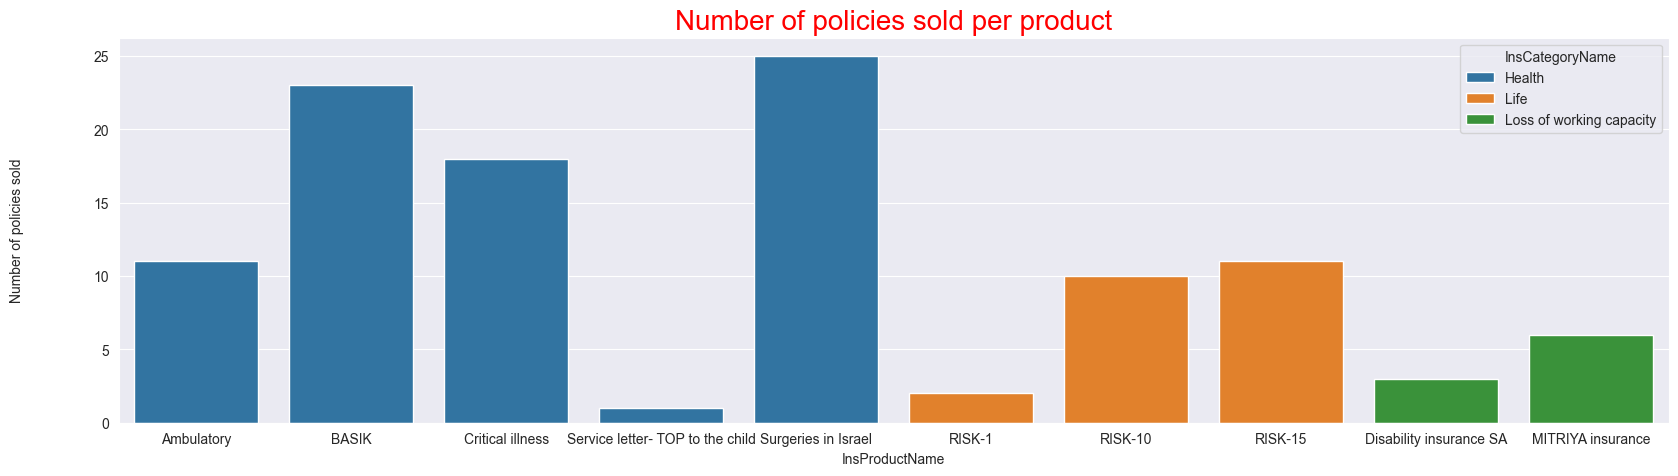

In [38]:
plt.figure(figsize=(20,5))
sb.set_style("darkgrid")
plt.title('Number of policies sold per product',loc='center',fontsize=20,color='r')
plt.ylabel('Number of policies sold',labelpad=50,loc='center')
sb.barplot(data=y,x="InsProductName",y="Number of policies sold",hue="InsCategoryName")
plt.show()

In [39]:
#ניתן לראות שכמות הפוליסות שנמכרות בתחום הבריאות גבוהה משמעותית מיתר הענפים: החיים וא.כ.ע

<Figure size 2500x600 with 0 Axes>

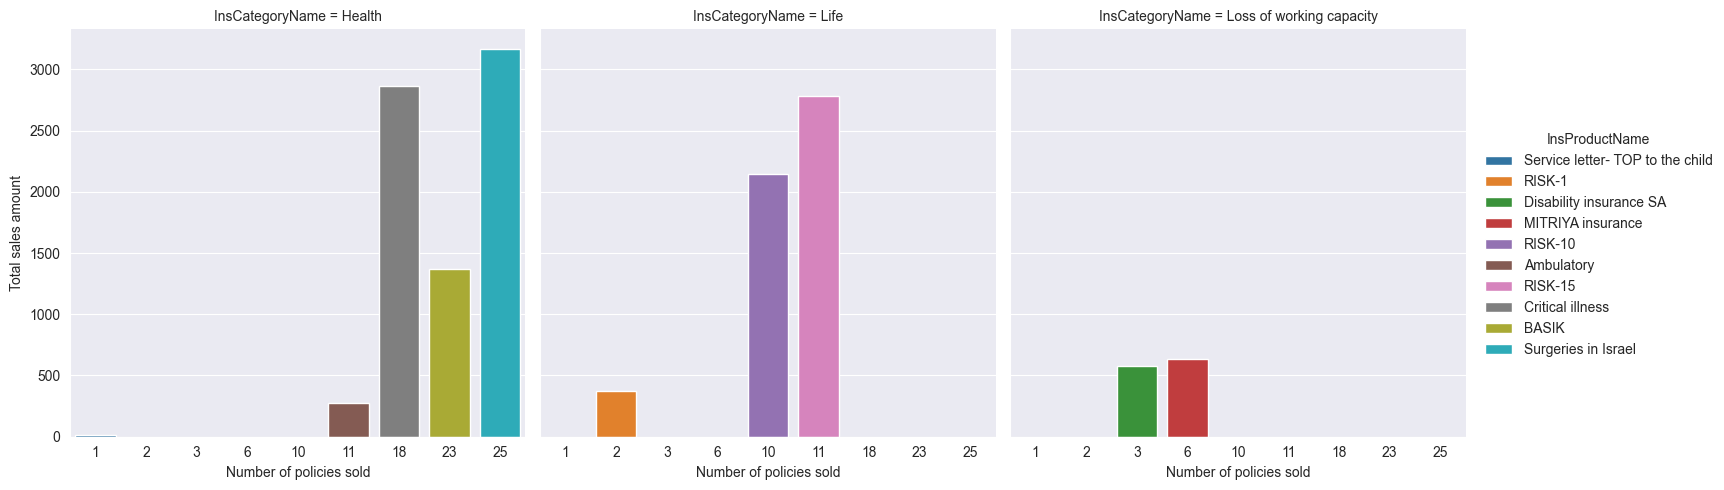

In [40]:
plt.figure(figsize=(25,6))
sb.set_style("darkgrid")
#plt.title('Number of policies sold per product',fontsize=20,color='r')
sb.catplot(data=y,x="Number of policies sold",y="Total sales amount",hue="InsProductName",kind="bar",col="InsCategoryName")
plt.show()

In [41]:
#ניתן לראות שהביטוחים שנותנים את ההכנסות הכי גבוהות הם ביטוחי החיים ריסק-10 וריסק-15 שבהם המחיר יקר יותר ומקובע לאורך השנים. ביחס לכמות הפוליסות הנמכרת ההכנסות 
#הן גבוהות. לאחר מכן ביטוח מחלות קשות וניתוחים בישראל. יתר הפוליסות נמכרות בכמות משמעותית נמוכה וההכנסות הכוללות מהן נמוכות יותר
#לא ניתן לבחון ריווחיות מהנתונים, כי רווחיות היא ביחס לתביעות ואין נתונים לגבי התביעות
#פוליסת מטריה היא ביטוח לא יקר שמתלבש על א.כ.ע בפנסיה,מנורה היא קרן הפנסיה הגדולה בישראל ולא הגיוני שתמכר כמות פוליסות קטנה כ"כ ע"י המשווקים. כדאי לייצר מבצע למשווקים על מכירת הפוליסה 
#כדי למכור משמעותית יותר.ביטוח המטריה רווחי כי במרבית המקרים המבוטח לא תובע את הפוליסה כי קרן הפנסיה משלמת לו א.כ.ע , רק במקרים שהיא דוחה אותו (מעטים) יתבעו את הפוליסה
#לכן חשוב להיות ממוקדים בהגדלת היקף המכירות משמעותית לפוליסה זו

In [42]:
z=PolicyDetails2.groupby(["Marketer's_Name","InsProductName"])[["InsProductId"]].count()

In [43]:
z.rename(columns={"InsProductId":"Number of policies sold"}, inplace=True)

In [44]:
z

Number of policies sold
Marketer's_Name InsProductName                                           
Cohen Asaf      Ambulatory                                              5
                BASIK                                                   9
                Critical illness                                        6
                RISK-10                                                 6
                Service letter- TOP to the child                        1
                Surgeries in Israel                                     9
Green Shmulik   BASIK                                                   2
                Critical illness                                        3
                Disability insurance SA                                 1
                MITRIYA insurance                                       1
                RISK-10                                                 3
                RISK-15                                                 1
                Surgeries in Israel                                     3
Levi Amir       Ambulatory                                              4
                BASIK                                                   4
                Critical illness                                        6
                MITRIYA insurance                                       3
                RISK-1                                                  2
                RISK-15                                                 4
                Surgeries in Israel                                     7
Levi Efrat      BASIK                                                   4
                Disability insurance SA                                 1
                MITRIYA insurance                                       2
                RISK-10                                                 1
                RISK-15                                                 4
                Surgeries in Israel                                     2
Levitan Tami    Ambulatory                                              2
                BASIK                                                   4
                Critical illness                                        3
                Disability insurance SA                                 1
                RISK-15                                                 2
                Surgeries in Israel                                     4

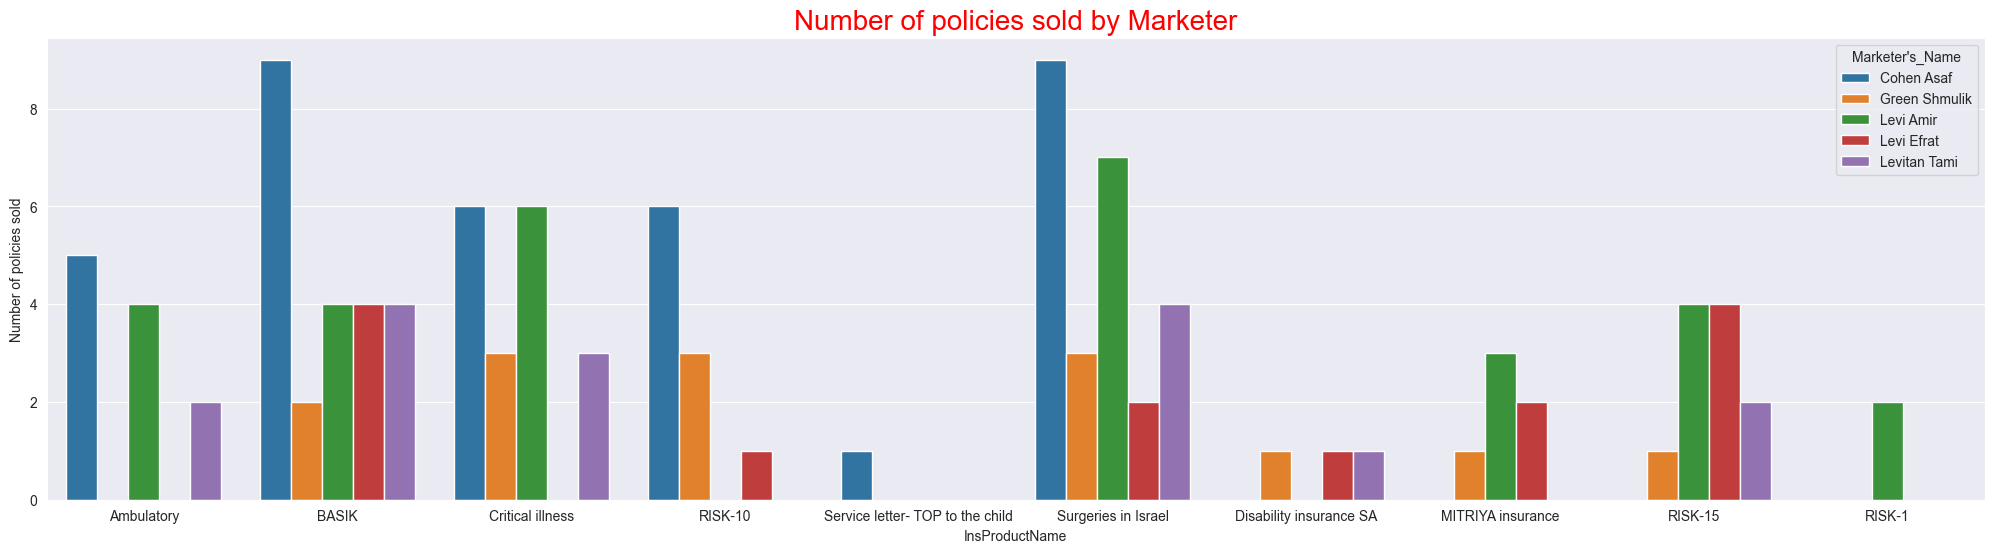

In [45]:
plt.figure(figsize=(25,6))
#sb.set_style("darkgrid")
plt.title('Number of policies sold by Marketer',loc='center',fontsize=20,color='r')
sb.barplot(data=z,x="InsProductName",y="Number of policies sold",hue="Marketer's_Name")
plt.show()

In [46]:
#ניתן לראות מי המשווקים שמתמקדים במכירת המוצרים עם ההכנסות הגבוהות יותר (יקרים יותר, כמו: מחלות קשות, ניתוחים בישראל, ביטוח חיים) וממילא מיצרים הכנסות גבוהות יותר לחברה (כמו אסף כהן)
#חשוב למקד את המשווקים במוצרים אלו קודם כל. כל מנהל יכול לראות בגרף מי מהעובדים נדרש להכוונה ומיקוד ולטפל בזה

In [47]:
policy_life=PolicyDetails2.Policy_End_Date-PolicyDetails2.Policy_Start_Date

In [48]:
PolicyDetails2.insert(8,"policy_life",PolicyDetails2.Policy_End_Date-PolicyDetails2.Policy_Start_Date)

In [49]:
PolicyDetails2

,PolicyId,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,policy_life,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,EmployeeId,Marketer's_Name,Year
0,900500111,104,BASIK,2,Health,2020-12-06,NaT,NaN,NaT,40,0.10,36.000000,NaN,False,1,Levi Amir,2020
1,900500111,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,NaT,80,0.10,72.000000,NaN,False,1,Levi Amir,2020
2,900500111,106,Ambulatory,2,Health,2020-12-06,NaT,NaN,NaT,20,0.15,17.000000,NaN,False,1,Levi Amir,2020
3,900500111,104,BASIK,2,Health,2020-12-06,NaT,NaN,NaT,43,0.10,38.700001,NaN,False,1,Levi Amir,2020
4,900500111,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,NaT,87,0.10,78.299995,NaN,False,1,Levi Amir,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,900500157,105,Surgeries in Israel,2,Health,2022-09-09,2024-12-20,cancelation,833 days,186,0.10,167.399994,NaN,False,2,Cohen Asaf,2022
106,900500158,104,BASIK,2,Health,2022-04-06,NaT,NaN,NaT,95,0.10,85.500000,NaN,False,3,Levi Efrat,2022
107,900500158,104,BASIK,2,Health,2022-04-06,NaT,NaN,NaT,86,0.10,77.400002,NaN,False,3,Levi Efrat,2022
108,900500159,103,RISK-15,1,Life,2022-11-13,2024-11-20,cancelation,738 days,485,0.10,436.500000,2000000.0,True,4,Green Shmulik,2022


In [50]:
a=PolicyDetails2[PolicyDetails2["policy_life"].notna()]

In [51]:
#פוליסות מבוטלות. נבדוק בממוצע מה אורך חיי פוליסה שבוטלה לפי סוג פוליסה, לפי משווק ולפי שילוב שלהם
a

,PolicyId,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,policy_life,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,EmployeeId,Marketer's_Name,Year
18,900500114,104,BASIK,2,Health,2020-10-21,2023-10-01,cancelation,1075 days,65,0.10,58.500000,NaN,False,4,Green Shmulik,2020
19,900500114,105,Surgeries in Israel,2,Health,2020-10-21,2023-10-01,cancelation,1075 days,185,0.10,166.500000,NaN,False,4,Green Shmulik,2020
30,900500118,109,MITRIYA insurance,3,Loss of working capacity,2020-12-24,2023-11-20,cancelation,1061 days,175,0.05,166.250000,15000.0,True,3,Levi Efrat,2020
40,900500124,104,BASIK,2,Health,2021-06-13,2024-03-25,cancelation,1016 days,64,0.10,57.599998,NaN,False,4,Green Shmulik,2021
41,900500124,105,Surgeries in Israel,2,Health,2021-06-13,2024-03-25,cancelation,1016 days,105,0.10,94.500000,NaN,False,4,Green Shmulik,2021
47,900500128,104,BASIK,2,Health,2021-09-05,2023-09-20,cancelation,745 days,67,0.00,67.000000,NaN,True,3,Levi Efrat,2021
48,900500129,109,MITRIYA insurance,3,Loss of working capacity,2021-06-17,2023-05-20,cancelation,702 days,87,0.05,82.650002,9000.0,False,4,Green Shmulik,2021
58,900500136,108,Critical illness,2,Health,2021-12-06,2023-11-27,cancelation,721 days,250,0.20,200.000000,200000.0,False,1,Levi Amir,2021
59,900500136,109,MITRIYA insurance,3,Loss of working capacity,2021-12-06,2023-11-27,cancelation,721 days,80,0.05,76.000000,13000.0,False,1,Levi Amir,2021
60,900500136,108,Critical illness,2,Health,2021-12-06,2023-11-27,cancelation,721 days,200,0.20,160.000000,200000.0,False,1,Levi Amir,2021


In [52]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 18 to 109
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   PolicyId                26 non-null     object         
 1   InsProductId            26 non-null     object         
 2   InsProductName          26 non-null     object         
 3   InsCategoryId           26 non-null     object         
 4   InsCategoryName         26 non-null     object         
 5   Policy_Start_Date       26 non-null     datetime64[ns] 
 6   Policy_End_Date         26 non-null     datetime64[ns] 
 7   Policy_End_Reason       26 non-null     object         
 8   policy_life             26 non-null     timedelta64[ns]
 9   Price_Before_Discuont1  26 non-null     int64          
 10  Discount                26 non-null     float64        
 11  Price_After_Discount    26 non-null     float64        
 12  CompensationSum         13 non-null     f

In [53]:
a.insert(10,"policy_life-years",PolicyDetails2["policy_life"].dt.days/365)

In [54]:
a.describe()

,Policy_Start_Date,Policy_End_Date,policy_life,Price_Before_Discuont1,policy_life-years,Discount,Price_After_Discount,CompensationSum,Year
count,26,26,26,26.000000,26.000000,26.000000,26.000000,1.300000e+01,26.000000
mean,2022-02-13 11:04:36.923076864,2023-12-21 11:04:36.923076864,676 days 00:00:00,165.115385,1.852055,0.119231,143.226923,4.688462e+05,2021.384615
min,2020-10-21 00:00:00,2023-04-21 00:00:00,220 days 00:00:00,15.000000,0.602740,0.000000,12.000000,8.000000e+03,2020.000000
25%,2021-09-28 00:00:00,2023-09-22 18:00:00,460 days 12:00:00,87.000000,1.261644,0.062500,79.387497,1.500000e+04,2021.000000
50%,2022-03-10 12:00:00,2023-11-27 00:00:00,721 days 00:00:00,166.500000,1.975342,0.100000,141.450005,2.000000e+05,2021.500000
75%,2022-09-07 06:00:00,2024-03-25 00:00:00,811 days 00:00:00,211.250000,2.221918,0.150000,169.424992,1.000000e+06,2022.000000
max,2022-12-24 00:00:00,2024-12-20 00:00:00,1075 days 00:00:00,485.000000,2.945205,0.500000,436.500000,2.000000e+06,2022.000000
std,NaN,NaN,259 days 01:55:17.602593088,105.781029,0.709808,0.099073,90.811212,6.031460e+05,0.697247


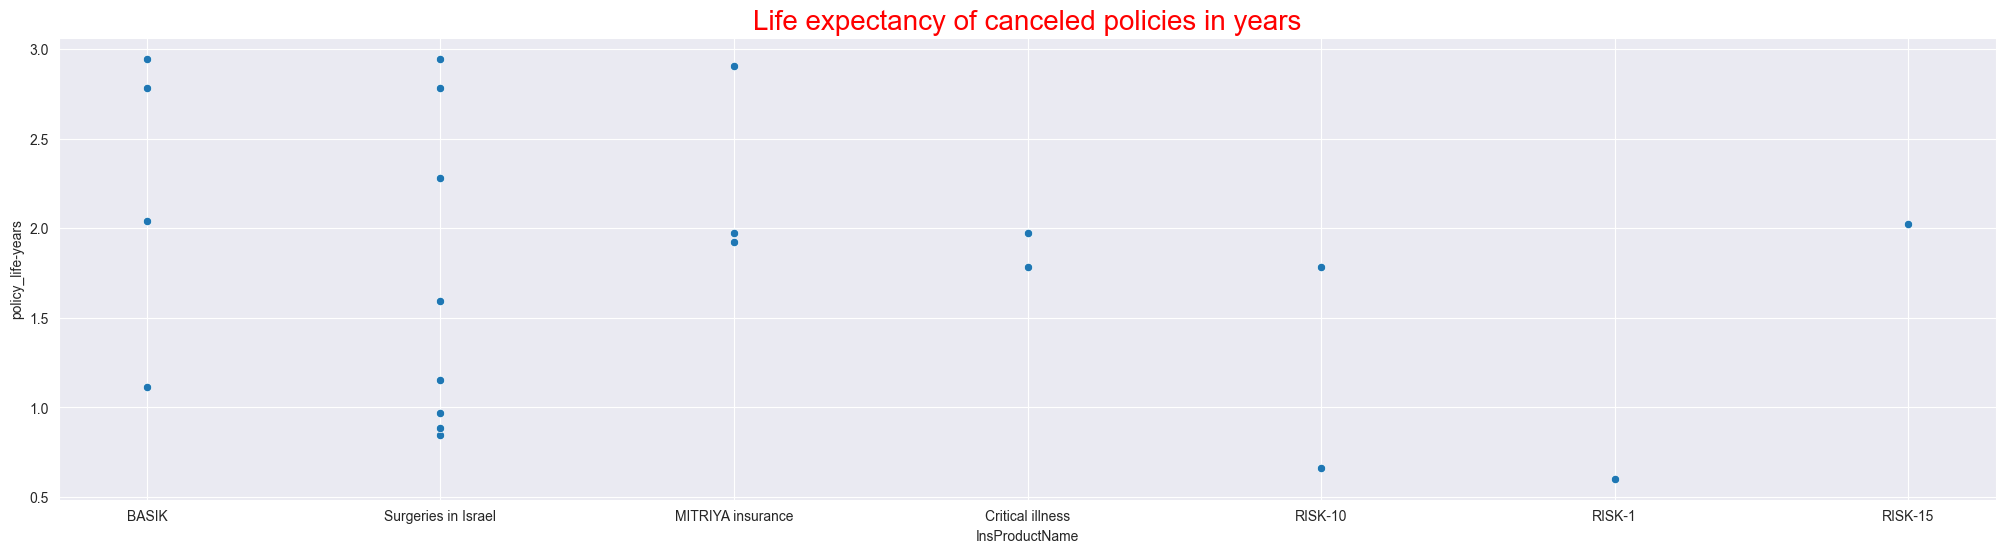

In [55]:
plt.figure(figsize=(25,6))
plt.title('Life expectancy of canceled policies in years',loc='center',fontsize=20,color='r')
sb.scatterplot(data=a,x="InsProductName",y="policy_life-years")
plt.show()
# .אין מספיק נתונים להסיק מסקנות, אבל ניתן לראות אילו ביטוחים מבוטלים תוך פחות משנה: ביטוחי חיים וניתוחים בישראל. ביטוח שמבוטל תוך פחות משנה, לא רווחי לחברה
#כמות הביטולים הגבוהה ביותר היא של מוצרי הבריאות: ביטוח בריאות בייסיק וניתוחים בישראל. כמות הפוליסות המבוטלות של ניתוחים בישראל כפולה מאשר של בייסיק. היא גם פוליסה יקרה יותר. 
#חשוב לבדוק את תהליך השימור של הפוליסות כשמתבקש ביטול ע"י הלקוח, עד כמה הוא מהיר ויעיל תוך התמקדות בביטוחי בריאות

In [56]:
a.groupby(["InsProductName"]).agg({"policy_life-years":"mean","Price_After_Discount":"mean"})

,policy_life-years,Price_After_Discount
InsProductName,,
BASIK,2.221233,65.349998
Critical illness,1.936986,103.680002
MITRIYA insurance,2.195205,101.887501
RISK-1,0.602740,127.000000
RISK-10,1.221918,255.425011
RISK-15,2.021918,436.500000
Surgeries in Israel,1.748250,162.466665


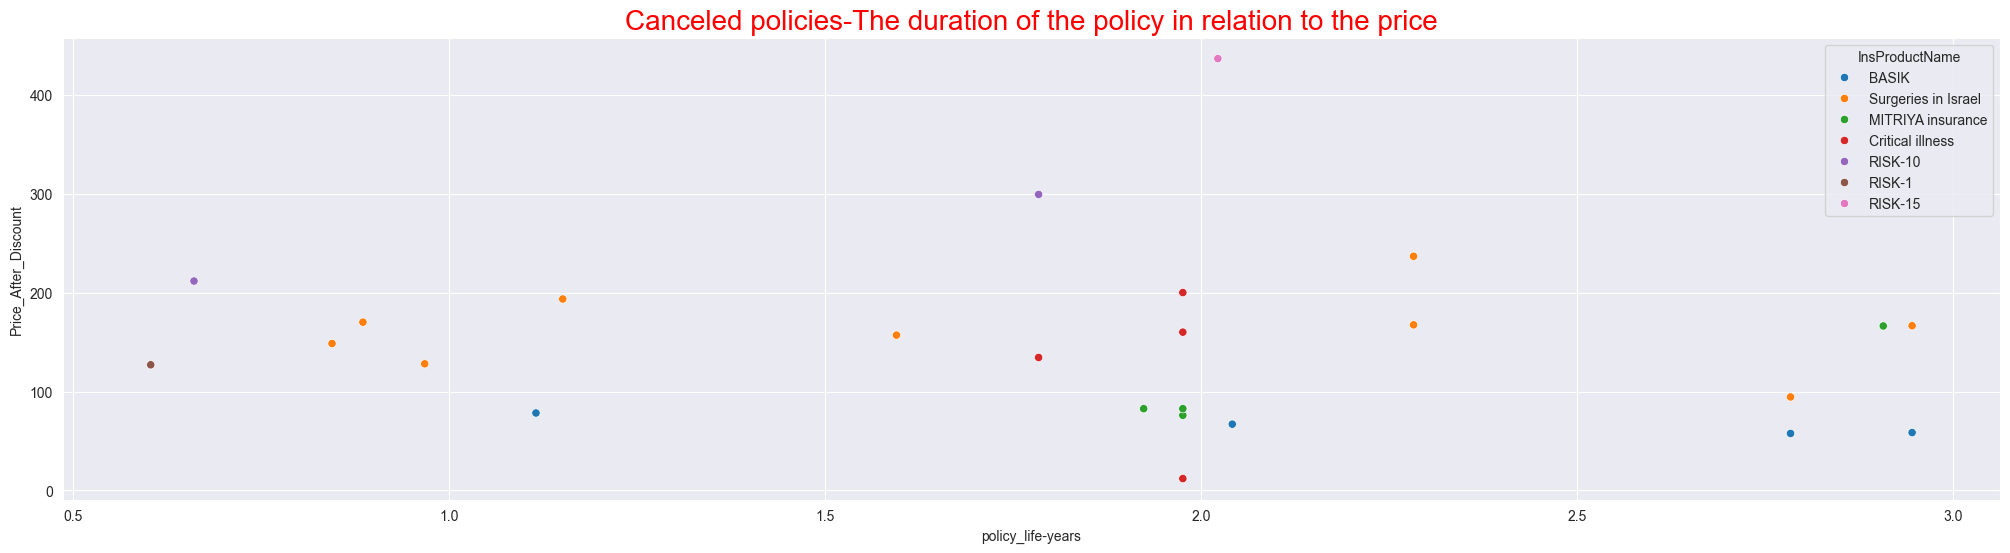

In [57]:
plt.figure(figsize=(25,6))
plt.title('Canceled policies-The duration of the policy in relation to the price',loc='center',fontsize=20,color='r')
sb.scatterplot(data=a,x="policy_life-years",y="Price_After_Discount",hue="InsProductName")
plt.show()

In [58]:
#לא נראה קשר ברור בין מחיר הפוליסה למשך חייה עד הביטול
#גם לא לפי סוג פוליסה (כמות הנתונים לא מאפשרת להסיק מסקנות גם לגבי פוליסת המטריה שכל הביטולים היו לאחר אותו משך זמן עם מחיר פוליסה דומה)

In [59]:
a.groupby(["Marketer's_Name"]).agg({"policy_life-years":"mean","Price_After_Discount":"mean"})

,policy_life-years,Price_After_Discount
Marketer's_Name,,
Cohen Asaf,2.282192,202.049995
Green Shmulik,2.201522,164.261113
Levi Amir,1.700685,107.893750
Levi Efrat,1.643836,143.225002
Levitan Tami,1.198174,135.133329


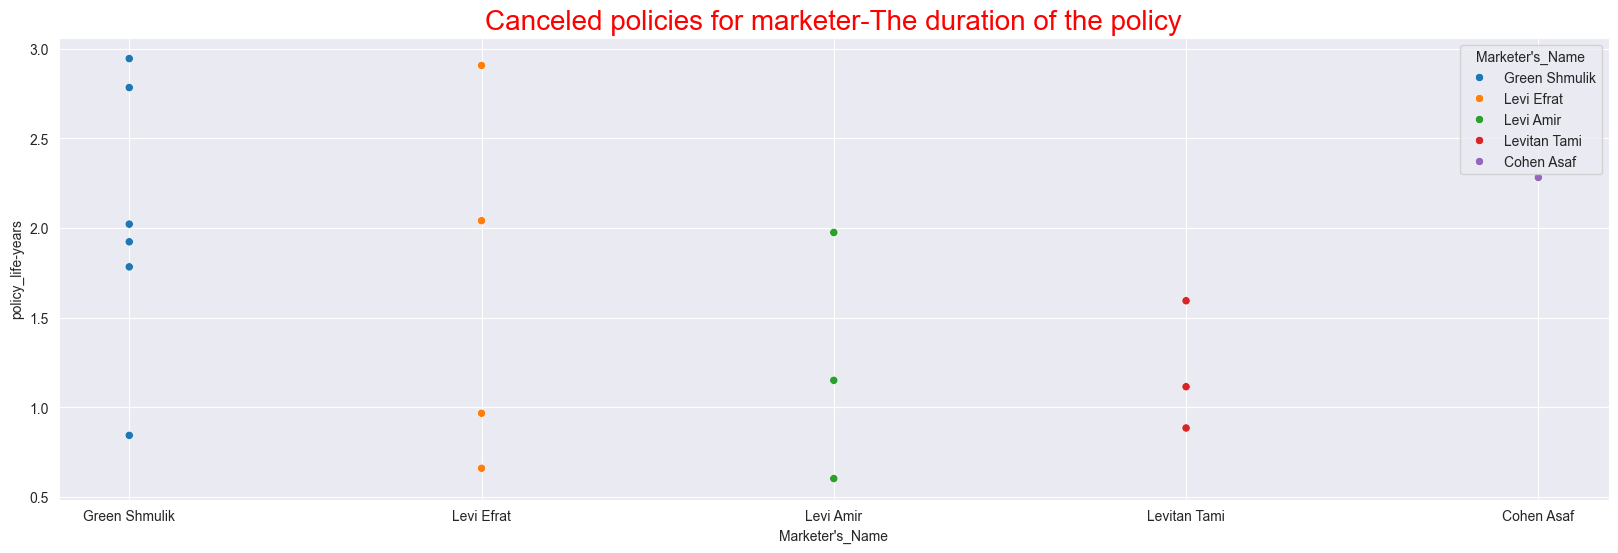

In [60]:
plt.figure(figsize=(20,6))
plt.title('Canceled policies for marketer-The duration of the policy',loc='center',fontsize=20,color='r')
sb.scatterplot(data=a,x="Marketer's_Name",y="policy_life-years",hue="Marketer's_Name")
plt.show()

In [61]:
#ניתן לראות שכהן אסף מוביל במכירות ואין לו כמעט ביטולים. ז"א שיש לו מכירה איכותית, מומלץ ליצר תגמול נוסף לאנשי מכירות כאלה
#לשמוליק גרין כמות גדולה של ביטולים והמכירות שלו יחסית מהנמוכות, כדאי לקרוא לו לשיחה ושראש הצוות ילווה אותו בפגישות

In [62]:
a.groupby(["InsProductName","Marketer's_Name"]).agg({"policy_life":"mean","Price_After_Discount":"mean"})


policy_life  Price_After_Discount
InsProductName      Marketer's_Name                                         
BASIK               Green Shmulik   1045 days 12:00:00             58.049999
                    Levi Efrat       745 days 00:00:00             67.000000
                    Levitan Tami     407 days 00:00:00             78.299995
Critical illness    Green Shmulik    651 days 00:00:00            134.400009
                    Levi Amir        721 days 00:00:00             96.000000
MITRIYA insurance   Green Shmulik    702 days 00:00:00             82.650002
                    Levi Amir        721 days 00:00:00             79.325001
                    Levi Efrat      1061 days 00:00:00            166.250000
RISK-1              Levi Amir        220 days 00:00:00            127.000000
RISK-10             Green Shmulik    651 days 00:00:00            299.200012
                    Levi Efrat       241 days 00:00:00            211.650009
RISK-15             Green Shmulik    738 days 00:00:00            436.500000
Surgeries in Israel Cohen Asaf       833 days 00:00:00            202.049995
                    Green Shmulik    799 days 16:00:00            136.500000
                    Levi Amir        420 days 00:00:00            193.500000
                    Levi Efrat       353 days 00:00:00            128.000000
                    Levitan Tami     452 days 12:00:00            163.549995

In [63]:
PolicyDetails3=pd.read_excel("DataProject/PolicyDetails3.xlsx")

In [64]:
PolicyDetails3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PolicyId                106 non-null    int64         
 1   InsuredID               106 non-null    int64         
 2   InsProductId            106 non-null    int64         
 3   InsProductName          106 non-null    object        
 4   InsCategoryId           106 non-null    int64         
 5   InsCategoryName         106 non-null    object        
 6   Policy_Start_Date       106 non-null    datetime64[ns]
 7   Policy_End_Date         23 non-null     datetime64[ns]
 8   Policy_End_Reason       23 non-null     object        
 9   Price_Before_Discuont1  106 non-null    int64         
 10  Discount                106 non-null    float64       
 11  Price_After_Discount    106 non-null    float64       
 12  CompensationSum         52 non-null     float64   

In [65]:
PolicyDetails3.head()

,PolicyId,InsuredID,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,BirthDate,Gender,Salary
0,900500111,25096863,104,BASIK,2,Health,2020-12-06,NaT,NaN,40,0.10,36.000000,NaN,False,1972-12-11,F,15000.0
1,900500111,25096863,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,80,0.10,72.000000,NaN,False,1972-12-11,F,15000.0
2,900500111,25096863,106,Ambulatory,2,Health,2020-12-06,NaT,NaN,20,0.15,17.000000,NaN,False,1972-12-11,F,15000.0
3,900500111,36498112,104,BASIK,2,Health,2020-12-06,NaT,NaN,43,0.10,38.700001,NaN,False,1972-06-17,M,10000.0
4,900500111,36498112,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,87,0.10,78.299995,NaN,False,1972-06-17,M,10000.0


In [66]:
PolicyDetails3["PolicyId"]=PolicyDetails3["PolicyId"].astype('str')
PolicyDetails3["InsCategoryId"]=PolicyDetails3["InsCategoryId"].astype('str')
PolicyDetails3["InsProductId"]=PolicyDetails3["InsProductId"].astype('str')
PolicyDetails3["InsuredID"]=PolicyDetails3["InsuredID"].astype('str')

In [67]:
PolicyDetails3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PolicyId                106 non-null    object        
 1   InsuredID               106 non-null    object        
 2   InsProductId            106 non-null    object        
 3   InsProductName          106 non-null    object        
 4   InsCategoryId           106 non-null    object        
 5   InsCategoryName         106 non-null    object        
 6   Policy_Start_Date       106 non-null    datetime64[ns]
 7   Policy_End_Date         23 non-null     datetime64[ns]
 8   Policy_End_Reason       23 non-null     object        
 9   Price_Before_Discuont1  106 non-null    int64         
 10  Discount                106 non-null    float64       
 11  Price_After_Discount    106 non-null    float64       
 12  CompensationSum         52 non-null     float64   

In [68]:
PolicyDetails3.describe()

,Policy_Start_Date,Policy_End_Date,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,BirthDate,Salary
count,106,23,106.000000,106.000000,106.000000,5.200000e+01,106,88.000000
mean,2021-08-03 16:04:31.698113280,2023-12-22 21:54:46.956521728,152.226415,0.130094,130.197547,5.165769e+05,1982-12-02 07:01:07.924528320,13284.090909
min,2020-02-14 00:00:00,2023-04-21 00:00:00,15.000000,0.050000,12.000000,8.000000e+03,1969-01-21 00:00:00,3500.000000
25%,2020-12-06 00:00:00,2023-10-01 00:00:00,56.000000,0.100000,47.600002,2.000000e+05,1972-07-31 06:00:00,7750.000000
50%,2021-09-09 00:00:00,2023-11-27 00:00:00,101.500000,0.100000,88.899998,2.000000e+05,1981-08-17 00:00:00,13000.000000
75%,2022-04-07 00:00:00,2024-03-25 00:00:00,215.000000,0.150000,193.500000,1.000000e+06,1990-03-09 00:00:00,19000.000000
max,2022-12-24 00:00:00,2024-12-20 00:00:00,568.000000,0.500000,511.199982,2.000000e+06,2008-12-24 00:00:00,25500.000000
std,NaN,NaN,125.637974,0.066023,104.708055,4.823840e+05,NaN,7013.040175


In [69]:
#ניתן לראות כי סטיית התקן למחיר היא גבוהה, כנראה בגלל כמות הנתונים הנמוכה והפיזור שלהם

In [70]:
PolicyDetails3.insert(15,"age",(pd.Timestamp.today()-PolicyDetails3["BirthDate"]).dt.days/365)

In [71]:
PolicyDetails3.head()

,PolicyId,InsuredID,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,BirthDate,age,Gender,Salary
0,900500111,25096863,104,BASIK,2,Health,2020-12-06,NaT,NaN,40,0.10,36.000000,NaN,False,1972-12-11,51.586301,F,15000.0
1,900500111,25096863,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,80,0.10,72.000000,NaN,False,1972-12-11,51.586301,F,15000.0
2,900500111,25096863,106,Ambulatory,2,Health,2020-12-06,NaT,NaN,20,0.15,17.000000,NaN,False,1972-12-11,51.586301,F,15000.0
3,900500111,36498112,104,BASIK,2,Health,2020-12-06,NaT,NaN,43,0.10,38.700001,NaN,False,1972-06-17,52.071233,M,10000.0
4,900500111,36498112,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,87,0.10,78.299995,NaN,False,1972-06-17,52.071233,M,10000.0


In [72]:
PolicyDetails3.describe(include='object')

,PolicyId,InsuredID,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_End_Reason,Gender
count,106,106,106,106,106,106,23,106
unique,46,29,10,10,3,3,1,2
top,900500111,25096863,105,Surgeries in Israel,2,Health,cancelation,M
freq,12,7,23,23,74,74,23,61


In [73]:
#ניתן לראות מהטבלה הנ"ל שיש 23 ביטולי פוליסות, יש 3 קטגוריות של ביטוחים שהבריאות מופיעה 74 פעמים, יש 10 סוגי פוליסות מתוכן ביטוח ניתוחים
#בישראל מופיע הכי הרבה פעמים 23

In [74]:
PolicyDetails3["Gender"].replace({"M":"Male","F":"Female"},inplace=True)
PolicyDetails3["Smoke"].replace({False:"No smoker",True:"Smoker"},inplace=True)

C:\Users\מיכל גרינולד\AppData\Local\Temp\ipykernel_7976\3562555437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  PolicyDetails3["Gender"].replace({"M":"Male","F":"Female"},inplace=True)
C:\Users\מיכל גרינולד\AppData\Local\Temp\ipykernel_7976\3562555437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [75]:
PolicyDetails3

,PolicyId,InsuredID,InsProductId,InsProductName,InsCategoryId,InsCategoryName,Policy_Start_Date,Policy_End_Date,Policy_End_Reason,Price_Before_Discuont1,Discount,Price_After_Discount,CompensationSum,Smoke,BirthDate,age,Gender,Salary
0,900500111,25096863,104,BASIK,2,Health,2020-12-06,NaT,NaN,40,0.10,36.000000,NaN,No smoker,1972-12-11,51.586301,Female,15000.0
1,900500111,25096863,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,80,0.10,72.000000,NaN,No smoker,1972-12-11,51.586301,Female,15000.0
2,900500111,25096863,106,Ambulatory,2,Health,2020-12-06,NaT,NaN,20,0.15,17.000000,NaN,No smoker,1972-12-11,51.586301,Female,15000.0
3,900500111,36498112,104,BASIK,2,Health,2020-12-06,NaT,NaN,43,0.10,38.700001,NaN,No smoker,1972-06-17,52.071233,Male,10000.0
4,900500111,36498112,105,Surgeries in Israel,2,Health,2020-12-06,NaT,NaN,87,0.10,78.299995,NaN,No smoker,1972-06-17,52.071233,Male,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,900500157,25167849,105,Surgeries in Israel,2,Health,2022-09-09,2024-12-20,cancelation,263,0.10,236.699997,NaN,Smoker,1970-10-21,53.728767,Female,4500.0
102,900500157,28360099,105,Surgeries in Israel,2,Health,2022-09-09,2024-12-20,cancelation,186,0.10,167.399994,NaN,No smoker,1969-01-21,55.476712,Male,24500.0
103,900500158,37091483,104,BASIK,2,Health,2022-04-06,NaT,NaN,95,0.10,85.500000,NaN,No smoker,1981-08-17,42.898630,Male,5000.0
104,900500158,37096863,104,BASIK,2,Health,2022-04-06,NaT,NaN,86,0.10,77.400002,NaN,No smoker,1983-12-24,40.545205,Female,8000.0


In [76]:
PolicyDetails3.groupby(["Gender","Smoke"])[["age"]].mean()

age
Gender Smoke               
Female No smoker  43.074445
       Smoker     41.201370
Male   No smoker  38.801218
       Smoker     47.228767

In [77]:
#ניתן לראות מהטבלה הנ"ל את הגיל הממוצע של נשים וגברים, מעשנים ולא מעשנים שעושים ביטוח

In [78]:
c=PolicyDetails3.groupby(["Smoke","InsProductName"])[["PolicyId"]].count()

In [79]:
c.rename(columns={"PolicyId":"Number of policies"},inplace=True)

In [80]:
c

Number of policies
Smoke     InsProductName                                      
No smoker Ambulatory                                         9
          BASIK                                             16
          Critical illness                                  12
          Disability insurance SA                            1
          MITRIYA insurance                                  3
          RISK-10                                            6
          RISK-15                                            9
          Service letter- TOP to the child                   1
          Surgeries in Israel                               17
Smoker    Ambulatory                                         2
          BASIK                                              5
          Critical illness                                   6
          Disability insurance SA                            2
          MITRIYA insurance                                  3
          RISK-1                                             2
          RISK-10                                            4
          RISK-15                                            2
          Surgeries in Israel                                6

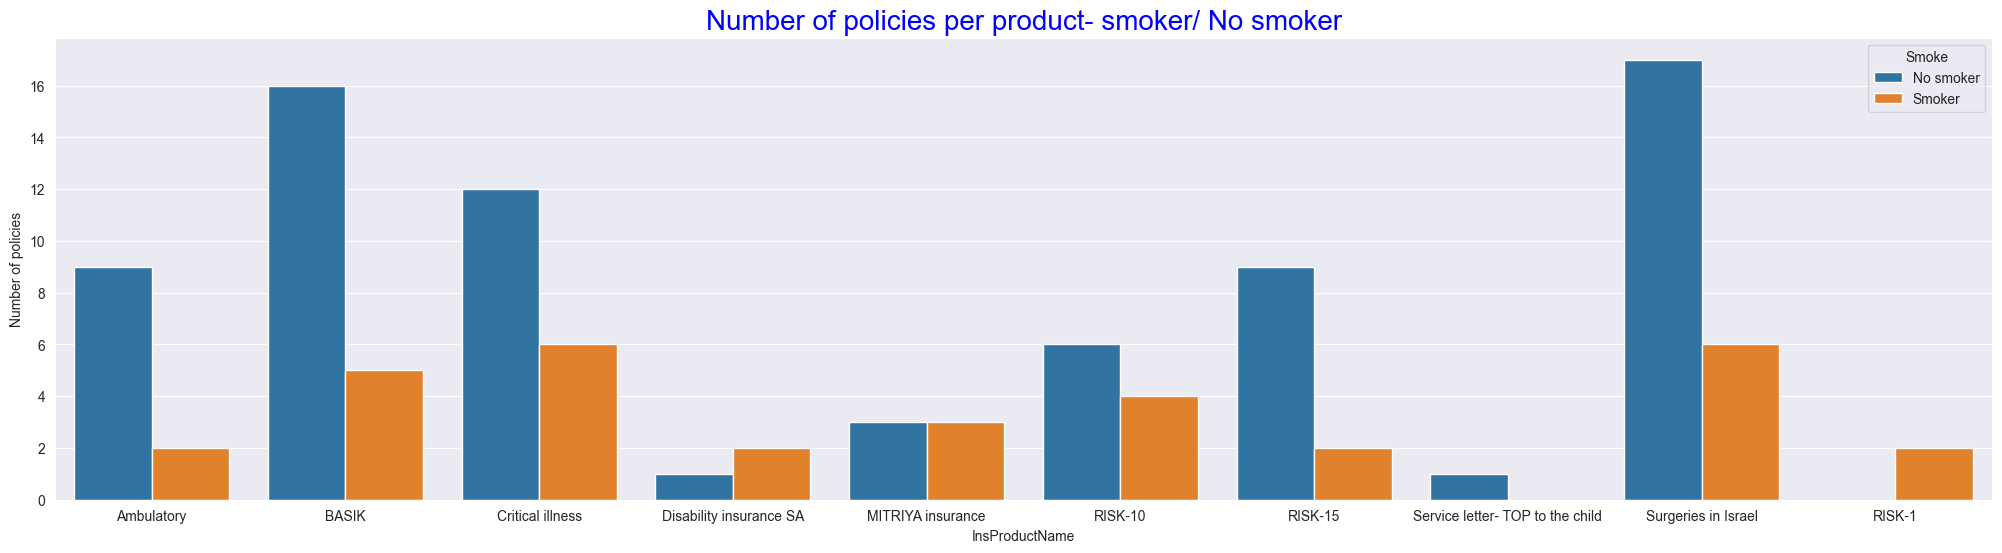

In [81]:
plt.figure(figsize=(25,6))
#sb.set_style("darkgrid")
plt.title('Number of policies per product- smoker/ No smoker',loc='center',fontsize=20,color='b')
sb.barplot(data=c,x="InsProductName",y="Number of policies" ,hue="Smoke")
plt.show()

In [82]:
#אפשר לראות שמעשנים עושים הרבה פחות ביטוחים מלא מעשנים, במיוחד ביטוחי בריאות, מחלות קשות וחיים, למרות שהם בעלי צורך גדול יותר. אולי כי הביטוחים יקרים יותר למעשנים 
#ואולי כי צריך לעורר אצלם את הצורך 
#כדאי להעביר הדרכה למשווקים על העלאת הצורך במהלך המכירה דווקא למעשנים ולבדוק אפשרות לתת הנחה גבוהה יותר מהקיימת היום (בשנה ראשונה) עבור מעשנים בגלל התעריף הגבוה

In [83]:
n=PolicyDetails3.groupby("Smoke")["PolicyId"].count()

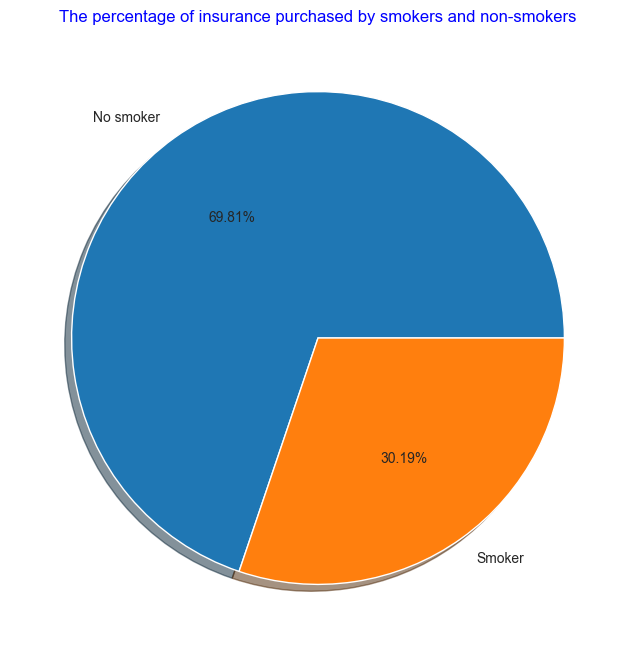

In [84]:
plt.figure(figsize=(8, 8))
plt.pie(x=n, labels=n.index, autopct='%1.2f%%', explode=(0, 0), shadow=True)
plt.title('The percentage of insurance purchased by smokers and non-smokers',color='b')
plt.show()

In [85]:
#אפשר לראות שכ-70% מהפוליסות נרכשות ע"י לא מעשנים ורק  30% נרכשות ע"י מעשנים, למרות שהיינו מצפים שמעשנים ירכשו יותר כי הם בסיכון גבוה יותר לחלות
#דווקא אצל מעשנים קל יותר לעורר את הצורך בביטוח, לאור הסכנה לחלות כתוצאה מהעישון. להסב את תשומת לב המשווק לשאול האם הלקוח מעשן או לא ולעורר בו את הצורך 
#לרכוש ביטוח

In [86]:
m=PolicyDetails3.groupby("Smoke")["Price_After_Discount"].sum()

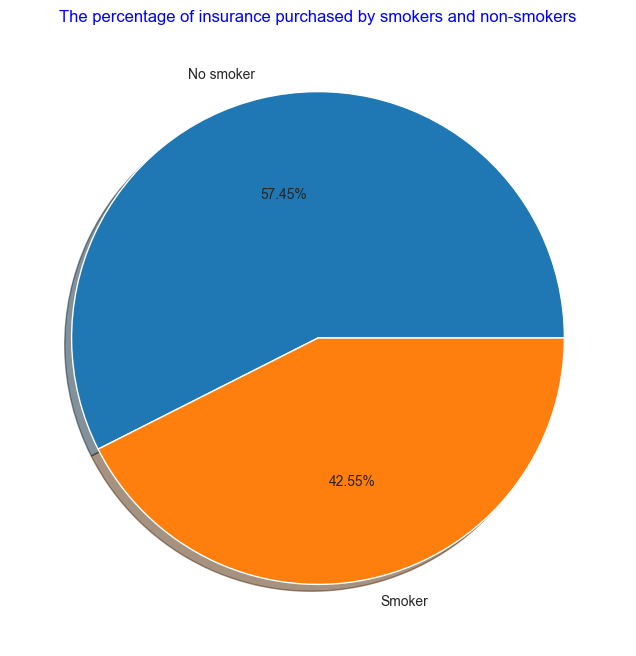

In [87]:
plt.figure(figsize=(8, 8))
plt.pie(x=m, labels=m.index, autopct='%1.2f%%', explode=(0, 0), shadow=True)
plt.title('The percentage of insurance purchased by smokers and non-smokers',color='b')
plt.show()

In [88]:
#אפשר לראות שמבחינת סכום המכירות, המעשנים מהווים 42% מההכנסות לעומת 30% מכמות המכירות. הסיבה היא שפוליסה למעשן יקרה יותר מאשר ללא מעשן
#ולכן כדאי לחזק את המכירה למעשנים ע"י הנחות מיוחדות ולהכשיר את המשווקים לדעת לעורר את הצורך בביטוח אצל מעשנים 

In [89]:
 fd=PolicyDetails3[PolicyDetails3["Smoke"]=="No smoker"]

In [90]:
t = fd.groupby("InsProductName")["PolicyId"].count()

In [91]:
t

InsProductName
Ambulatory                           9
BASIK                               16
Critical illness                    12
Disability insurance SA              1
MITRIYA insurance                    3
RISK-10                              6
RISK-15                              9
Service letter- TOP to the child     1
Surgeries in Israel                 17
Name: PolicyId, dtype: int64

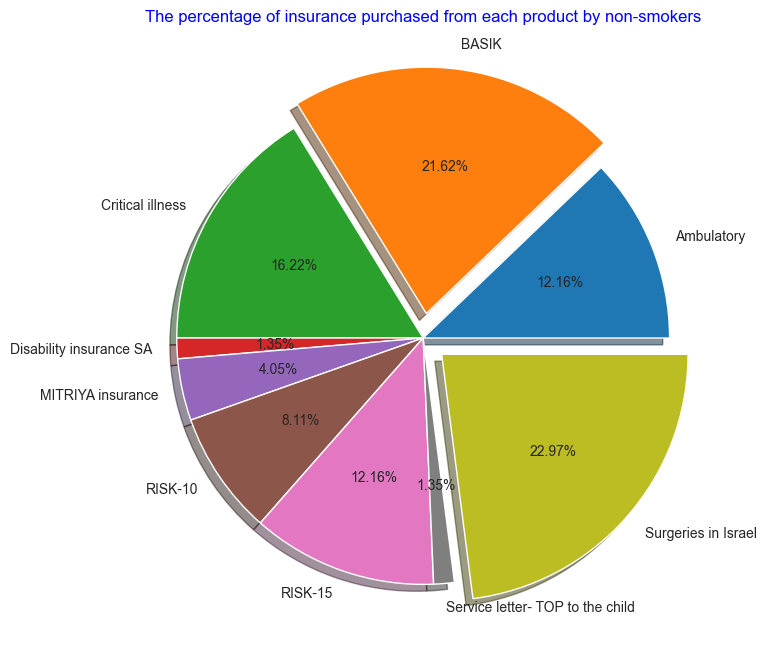

In [92]:
plt.figure(figsize=(8, 8))
plt.pie(x=t, labels=t.index, autopct='%1.2f%%', explode=(0, 0.1, 0, 0, 0, 0, 0, 0, 0.1), shadow=True)
plt.title('The percentage of insurance purchased from each product by non-smokers',color='b')
plt.show()

In [93]:
fd1=PolicyDetails3[PolicyDetails3["Smoke"]=="Smoker"]

In [94]:
t1=fd1.groupby("InsProductName")["PolicyId"].count()

In [95]:
t1

InsProductName
Ambulatory                 2
BASIK                      5
Critical illness           6
Disability insurance SA    2
MITRIYA insurance          3
RISK-1                     2
RISK-10                    4
RISK-15                    2
Surgeries in Israel        6
Name: PolicyId, dtype: int64

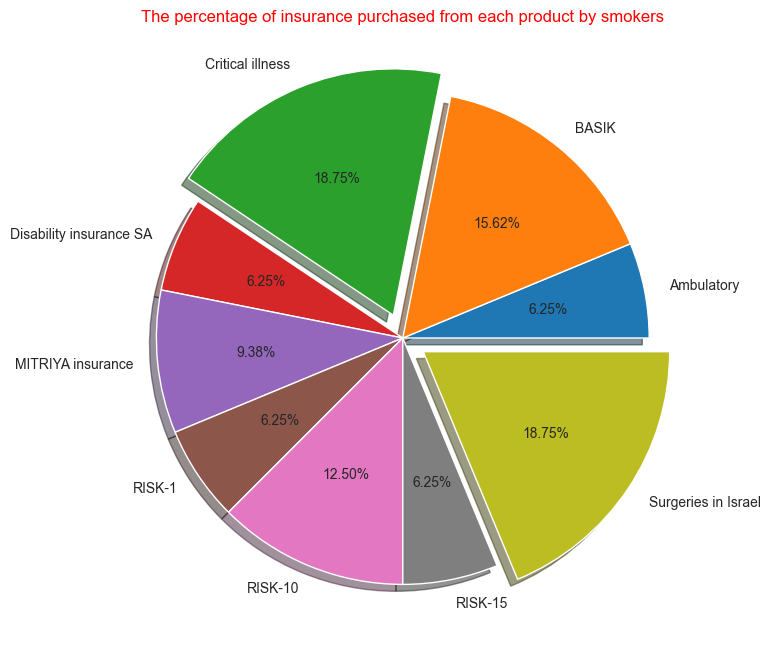

In [96]:
plt.figure(figsize=(8, 8))
plt.pie(x=t1, labels=t1.index, autopct='%1.2f%%', explode=(0, 0, 0.1, 0, 0, 0, 0, 0, 0.1), shadow=True)
plt.title('The percentage of insurance purchased from each product by smokers',color='r')
plt.show()

In [97]:
#אפשר לראות שלא מעשנים מתמקדים קודם כל בביטוח בריאות שנותן תשלום לטיפולים רפואיים ורק אח"כ בפוליסת פיצוי שנותנת כסף בעת גילוי מחלה קשה 
#מעשנים לעומת זאת רוכשים קודם כל ביטוח ניתוחים בישראל וביטוח מחלות קשות שנותן פיצוי כספי (באחוזים זהים) כפי שנראה בגרף שלהלן
#גם ביטוחי חיים (מכל הסוגים) מעשנים רוכשים יותר מלא מעשנים. ז"א שמעשנים מתמקדים יותר בפוליסות פיצוי מאשר פוליסות שיפוי לעומת לא מעשנים

In [98]:
d=PolicyDetails3.groupby(["Gender","InsProductName"])[["PolicyId"]].count()

In [99]:
d.rename(columns={"PolicyId":"Number of policies"},inplace=True)

In [100]:
d

Number of policies
Gender InsProductName                                      
Female Ambulatory                                         4
       BASIK                                              9
       Critical illness                                   6
       Disability insurance SA                            3
       MITRIYA insurance                                  3
       RISK-10                                            5
       RISK-15                                            4
       Service letter- TOP to the child                   1
       Surgeries in Israel                               10
Male   Ambulatory                                         7
       BASIK                                             12
       Critical illness                                  12
       MITRIYA insurance                                  3
       RISK-1                                             2
       RISK-10                                            5
       RISK-15                                            7
       Surgeries in Israel                               13

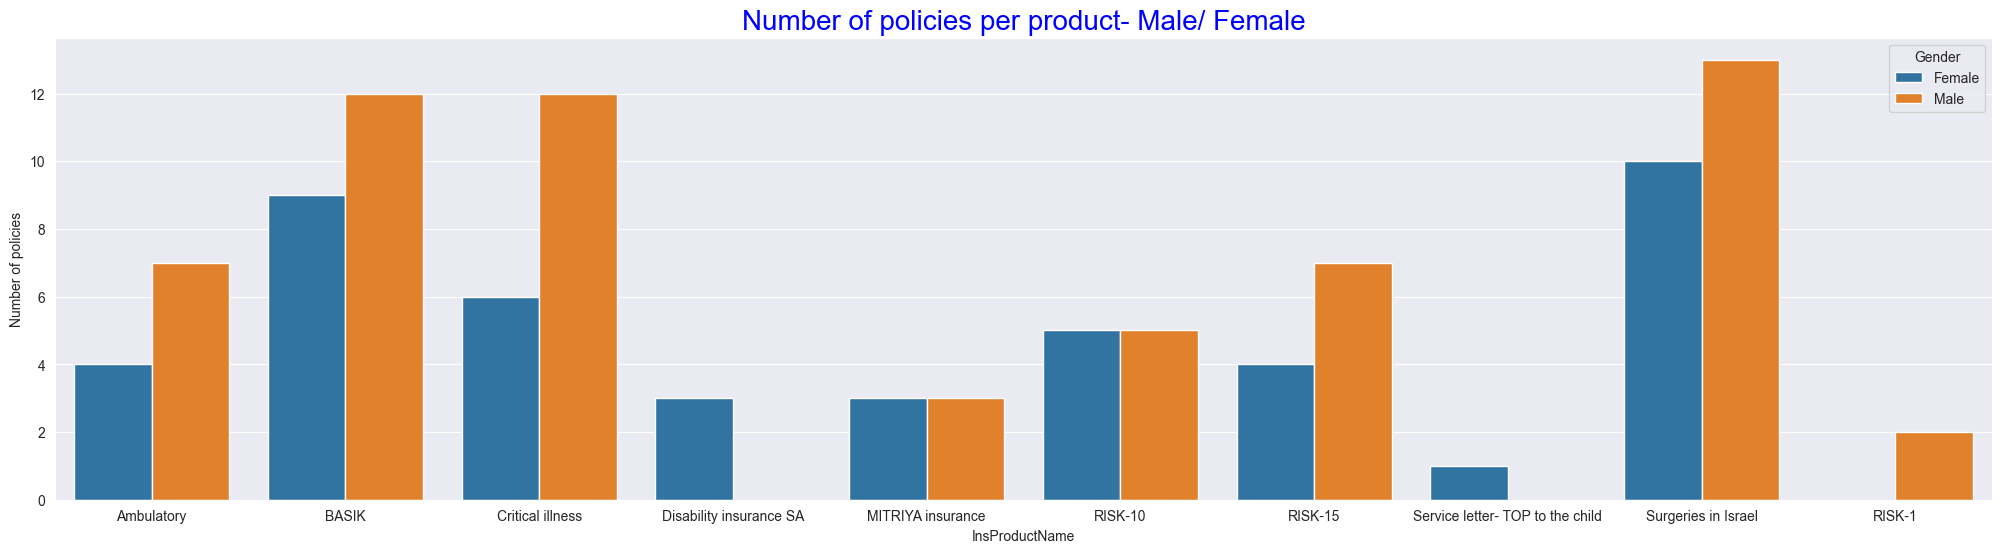

In [101]:
plt.figure(figsize=(25,6))
#sb.set_style("darkgrid")
plt.title('Number of policies per product- Male/ Female',loc='center',fontsize=20,color='b')
sb.barplot(data=d,x="InsProductName",y="Number of policies" ,hue="Gender")
plt.show()

In [102]:
#ניתן לראות שנשים קונות יותר פוליסות מגברים כמעט באופן מוחלט בכל המוצרים, ובאופן משמעותי יותר בביטוחי הבריאות. בפגישה משפחתית לעורר את הצורך מול הנשים בנושא ההגנות
#הפוליסות של גברים יקרות יותר מנשים, אולי יש לכך השפעה

C:\Users\מיכל גרינולד\AppData\Local\Temp\ipykernel_7976\399934776.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=PolicyDetails3,x="age",hue="InsProductName",row="InsCategoryName",kind="kde",aspect=2)


<Figure size 5000x2500 with 0 Axes>

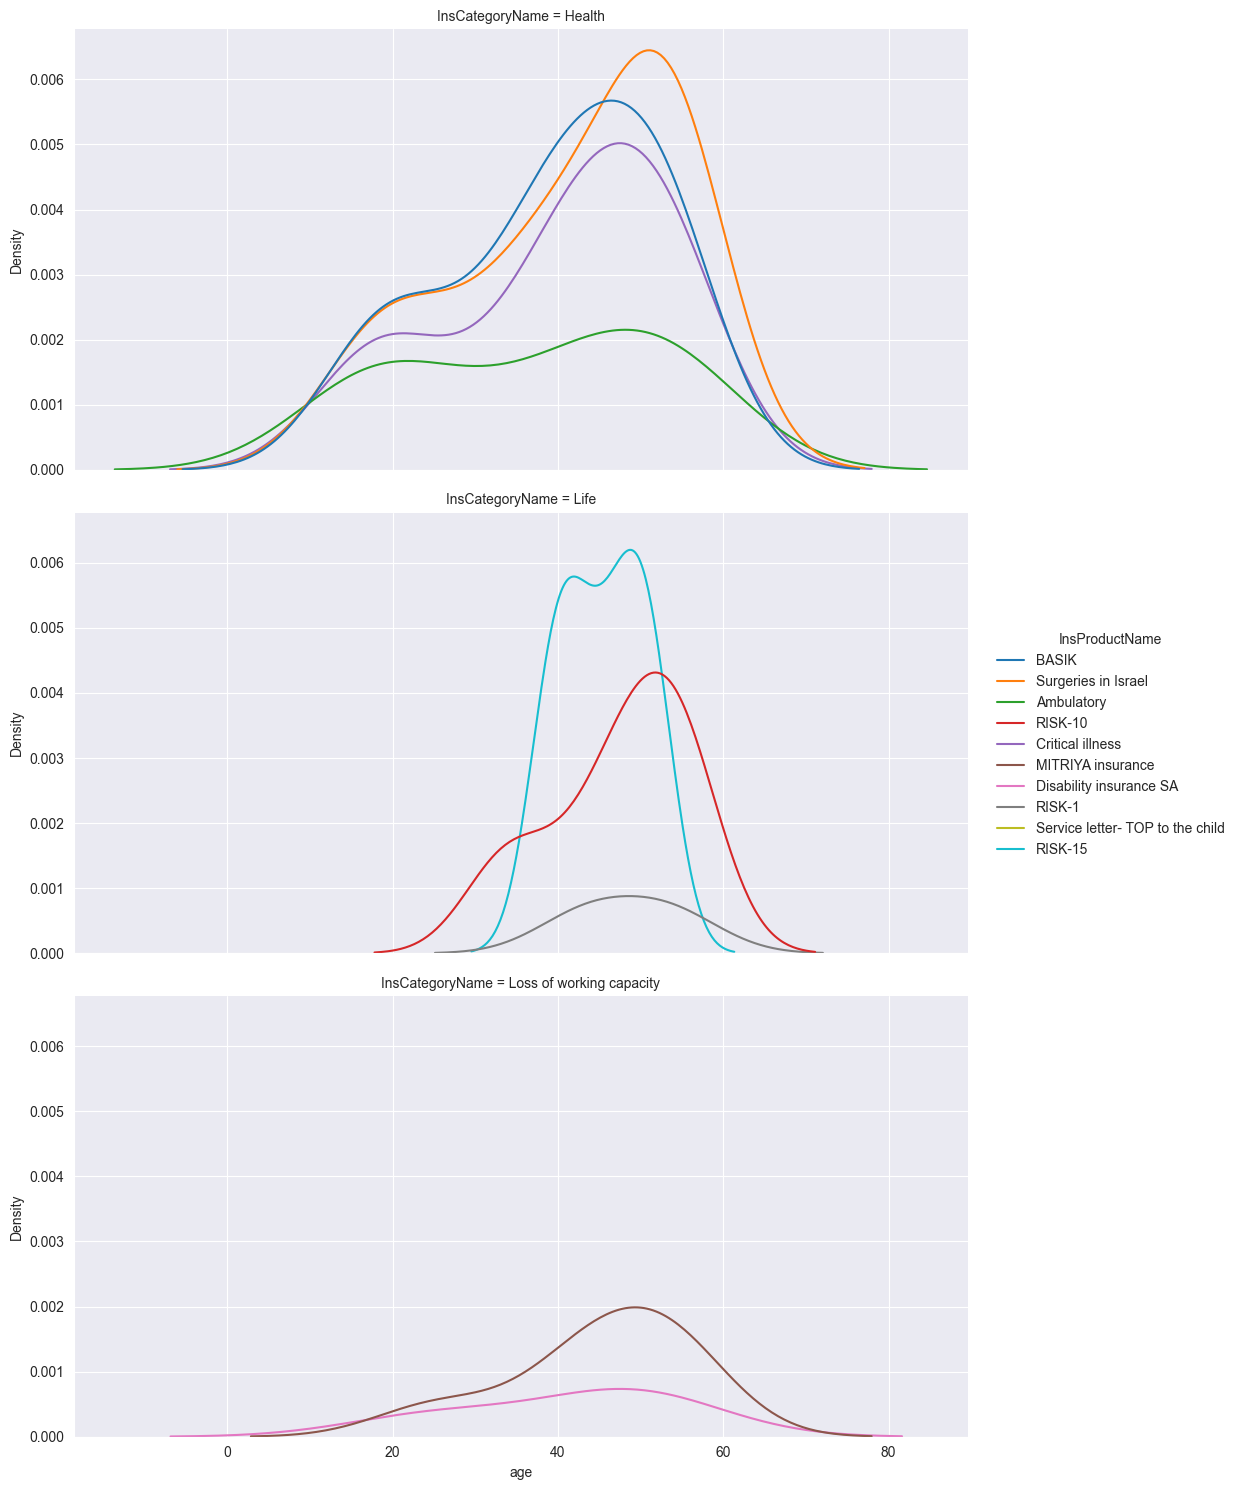

In [103]:
plt.figure(figsize=(50,25))
sb.displot(data=PolicyDetails3,x="age",hue="InsProductName",row="InsCategoryName",kind="kde",aspect=2)
plt.show()

In [104]:
#ניתן לראות שהכמות הגדולה של הביטוחים נעשית ע"י אנשים בגילאי 40-60, ז"א כדאי לעשות פילוח של הלקוחות הקיימים ולקוחות חדשים ולהתמקד באוכלוסיה זו.
#הביטוחים בגילאים אלו גם יקרים יותר בגלל הגיל והמצב הבריאותי שמתחיל להיות בעיייתי

In [105]:
PolicyDetails3[["InsuredID","PolicyId","Price_After_Discount"]].sort_values("InsuredID")

,InsuredID,PolicyId,Price_After_Discount
43,13287809,900500126,220.800003
93,13287809,900500151,268.199982
71,24117849,900500141,193.500000
21,24117849,900500116,244.500000
95,25025963,900500152,78.299995
...,...,...,...
90,55117949,900500149,299.200012
41,55117949,900500124,94.500000
55,55117949,900500134,296.000000
91,55117949,900500149,134.400009


In [106]:
CORR=pd.read_excel("DataProject/CORR.xlsx")

In [107]:
CORR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InsuredID               19 non-null     int64  
 1   MainInsured             19 non-null     bool   
 2   All_Policies_Total_Sum  19 non-null     float64
 3   Salary                  18 non-null     float64
 4   Age                     19 non-null     int64  
dtypes: bool(1), float64(2), int64(2)
memory usage: 759.0 bytes


In [108]:
CORR["InsuredID"]=CORR["InsuredID"].astype('str')

In [109]:
CORR.info()
#ניתן לראות שיש מבוטח ראשי שלא דיווח מה השכר שלו כי יש 19 רשומות בטבלה ורק ל 18 מתוכן מדווח שכר, ולכן בבדיקת הקשר בין שכר להוצאה על ביטוח, נמחק את הרשומה שלו

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InsuredID               19 non-null     object 
 1   MainInsured             19 non-null     bool   
 2   All_Policies_Total_Sum  19 non-null     float64
 3   Salary                  18 non-null     float64
 4   Age                     19 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 759.0+ bytes


In [ ]:
#ניתן לראות בטבלה הנ"ל שיש מבוטח ראשי אחד שלא דיווח על השכר שלו, הוא ריק בשכר יש רק 18 מתוך 19. אין לו השפעה על ממוצע השכר כי הוא ריק, הוא לא 0

In [110]:
CORR.head(50)

,InsuredID,MainInsured,All_Policies_Total_Sum,Salary,Age
0,24117849,True,438.00,16500.0,54
1,25025963,True,633.00,7000.0,49
2,25091763,True,384.96,8000.0,26
3,25096863,True,1453.55,15000.0,52
4,25099963,True,281.50,22000.0,50
5,25114849,True,253.70,14500.0,36
6,25117809,True,1389.80,23000.0,47
7,25117849,True,600.50,3500.0,34
8,25167849,True,2160.50,4500.0,54
9,25517849,True,377.90,11500.0,55


In [112]:
CORR.describe()
#גם פה סטיית התקן גבוהה בשל כמות הנתונים ואיכותם (אני המצאתי מספרים לא בהכרח תואמים למציאות)

,All_Policies_Total_Sum,Salary,Age
count,19.000000,18.000000,19.000000
mean,726.365263,15194.444444,45.631579
std,585.188048,6793.463313,7.889589
min,231.150000,3500.000000,26.000000
25%,342.225000,8875.000000,41.500000
50%,438.000000,16000.000000,49.000000
75%,975.600000,20500.000000,51.000000
max,2160.500000,25500.000000,55.000000


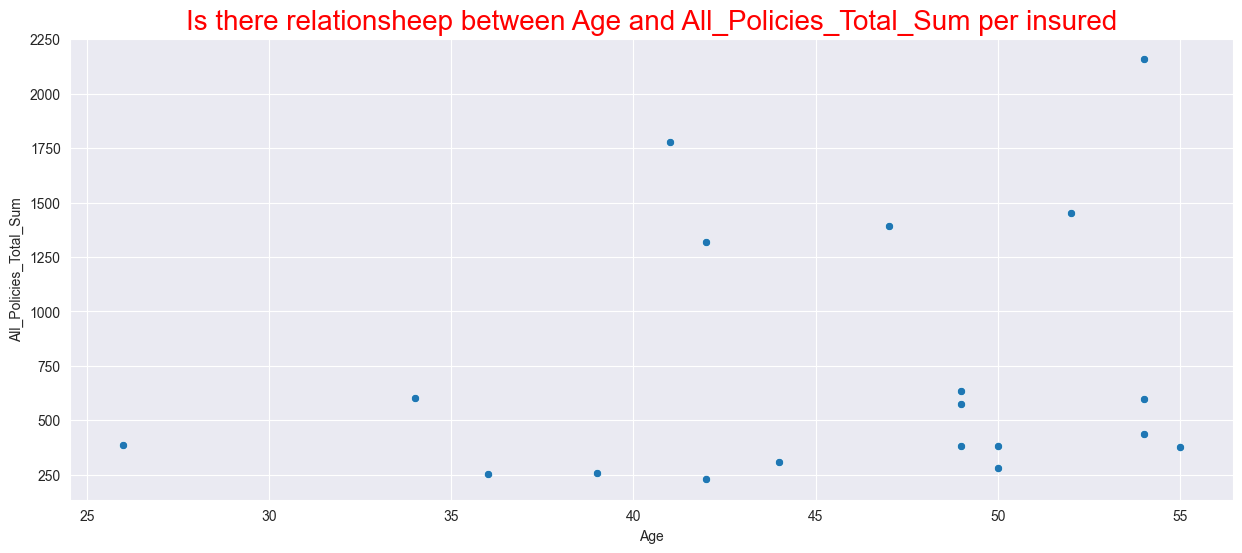

In [113]:
plt.figure(figsize=(15,6))
plt.title('Is there relationsheep between Age and All_Policies_Total_Sum per insured',loc='center',fontsize=20,color='r')
sb.scatterplot(data=CORR,x="Age",y="All_Policies_Total_Sum")
plt.show()

In [114]:
#נראה שככל שהמבוטחים עולים בקבוצת הגיל ההוצאה על ביטוח גדלה. כנראה בגלל שעלות הביטוח יקרה יותר, הם מבטחים את כל המשפחה ויש בעיות בריאות
#בגילאים המבוגרים יותר שמייקרות את הביטוח
# גם את הקשרים האלו ניתן לבדוק יותר לעומק עם מידע לגבי המבוטח האם הוא בריא או שיש בעיה בריאותיתת והאם מבוטחים בפוליסה כמה בני משפחה

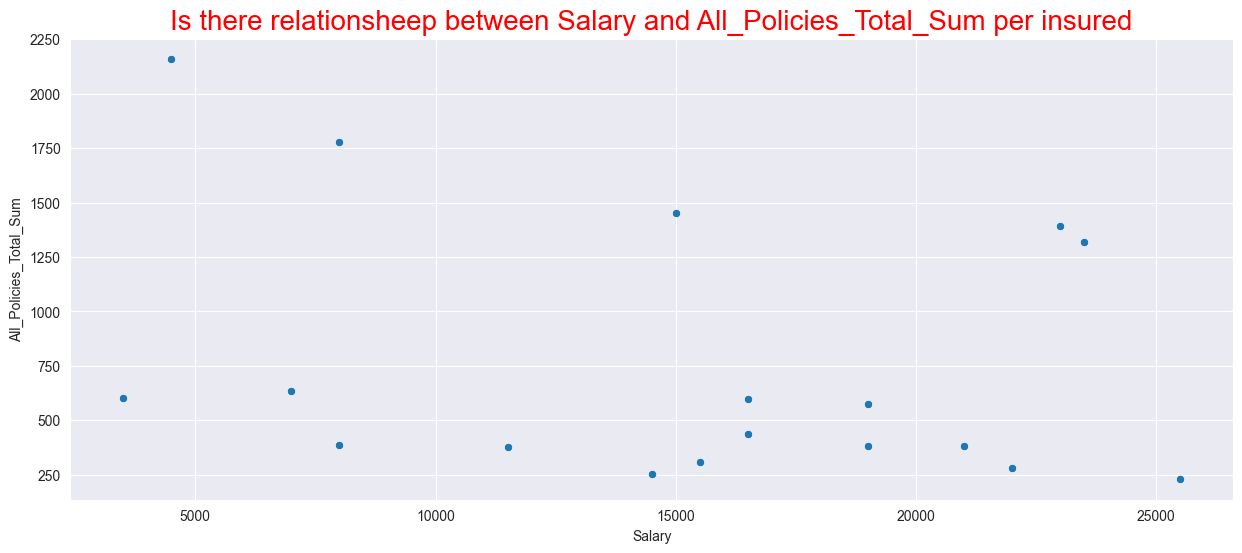

In [115]:
plt.figure(figsize=(15,6))
plt.title('Is there relationsheep between Salary and All_Policies_Total_Sum per insured',loc='center',fontsize=20,color='r')
sb.scatterplot(data=CORR,x="Salary",y="All_Policies_Total_Sum")
plt.show()

In [116]:
#יש רק 18 נקודות על הגרף, אין התיחסות למבוטח שלא דיווח על השכר שלו. בגלל שסטיית התקן גבוהה, לא הייתי משתמשת בממוצע השכר עבורו
#לא ניתן לראות שברמות שכר הגבוהות מוציאים יותר על ביטוח, כמו שהייתי מצפה לראות
# נראה שלא משנה מה השכר, רב המבוטחים מוציאים למשק בית עד 700 ש"ח על ביטוח

In [117]:
#כמו שכבר ציינתי בכתיבת השאילתא הנ"ל 
# נכון יותר לבדוק מול הגיל הממוצע של המבוטח ובן/בת זוגו ומול ההכנסה הכוללת למשק הבית 
#ולא רק לשכר של המבוטח הראשי, אבל לשם כך הייתי משנה בבסיס הנתונים את העמודה שבה מופיע האם המבוטח ראשי או משני, לרישום אחר
#מבוטח ראשי-1, מבוטח משני-2, ילדים-3 ואז הייתי בשכר מסכמת את השכר של המבוטח הראשי והמבוטח המשני. מחר צריך להגיש את הפרויקט, 
#אז לא הכנסתי את כל השינויים האלה. יתכן ואם אכן הייתי מספיקה לשנות היינו רואים שקיים קשר בין השכר לגובה ההוצאה על ביטוח

In [118]:
CORR.corr(numeric_only=True)

,MainInsured,All_Policies_Total_Sum,Salary,Age
MainInsured,NaN,NaN,NaN,NaN
All_Policies_Total_Sum,NaN,1.000000,-0.283165,0.200463
Salary,NaN,-0.283165,1.000000,0.228227
Age,NaN,0.200463,0.228227,1.000000


<Axes: >

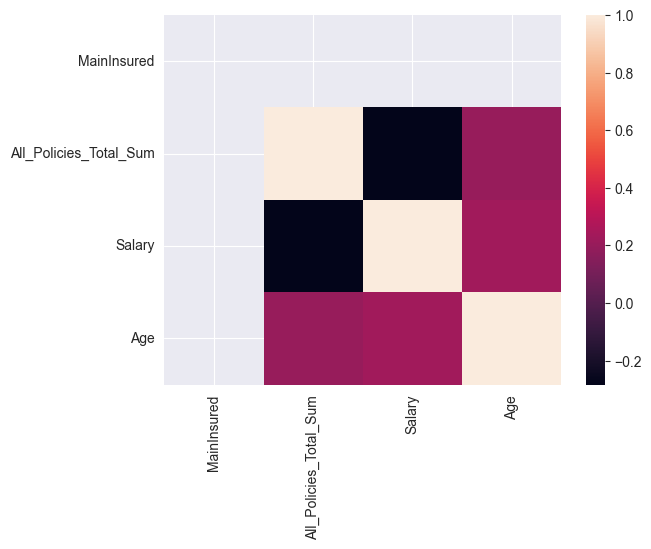

In [119]:
sb.heatmap(CORR.corr(numeric_only=True))

In [120]:
#הקשר בין סך ההוצאה על ביטוח לשכר בצבע שחור שהוא מתאם שלילי של 0.2- (לפי הסרגל צבעים) והקשר בין סך ההוצאה על ביטוח לגיל הוא חיובי של 0.2

In [121]:
#לפי זה כדאי להתמקד באוכלוסיה המבוגרת יותר 40-60 כאשר עושים פילוח למאגר נתונים של לקוחות פוטנציאליים ולהתחיל את המכירות בה, בהמשך לפנות לצעירים

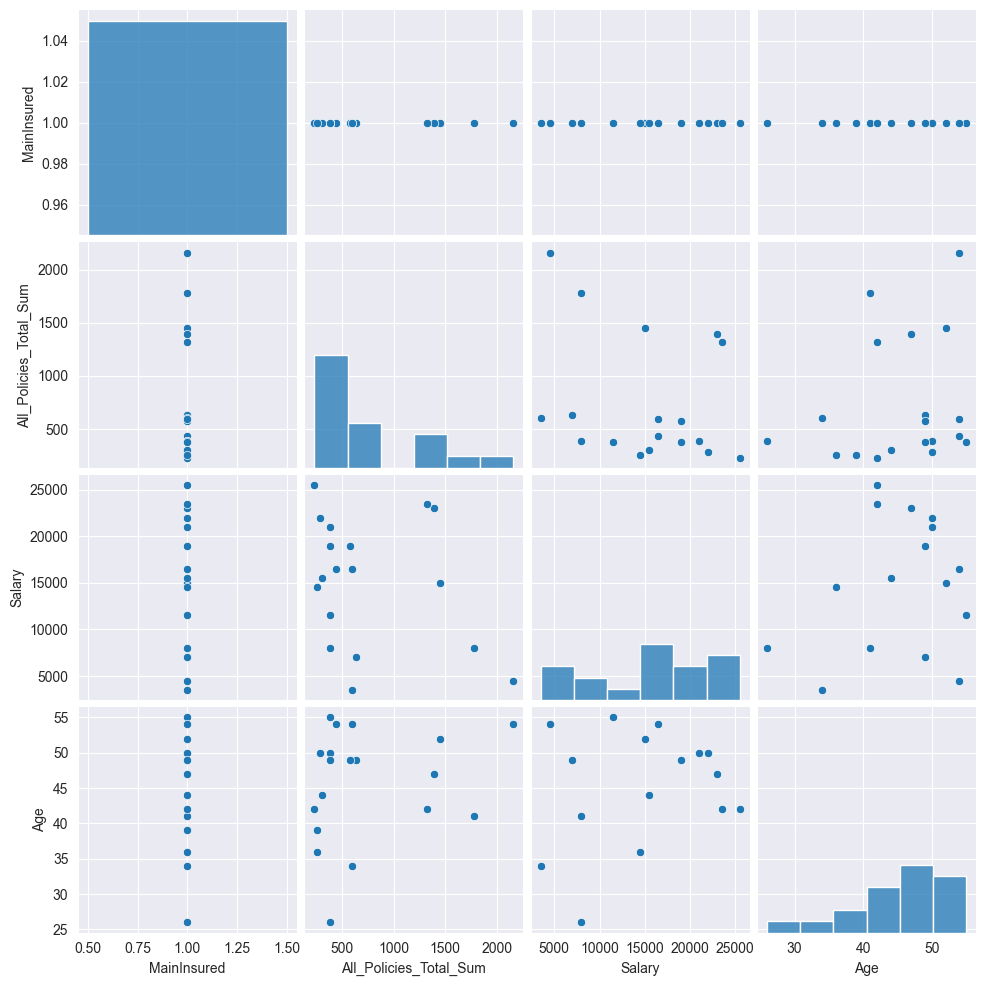

In [122]:
sb.pairplot(data=CORR)

In [ ]:
#ניתן לראות פה את הקשרים בין המשתנים שכבר ראינו בגרפים הקודמים